
**Introduction**

Life expectancy is a comprehensive measure of population health, encompassing not just individual health outcomes but also broader societal factors like economic stability, healthcare quality, and public health policies. Analyzing life expectancy across different countries can reveal insights into how various factors—such as education, income, healthcare access, and lifestyle choices—affect health outcomes globally.

The purpose of this analysis is to investigate the key determinants of life expectancy across developed and developing nations, understanding how these factors might differ by country status. A common assumption is that higher economic resources and better healthcare infrastructure lead to longer life expectancy. However, this relationship may vary significantly between regions. For example, in developing countries, community health initiatives may have an outsized impact, while in developed countries, lifestyle choices and healthcare quality might play a larger role.


**Research Questions**


**1. What are the strongest predictors of life expectancy?**

Which factors, such as GDP, healthcare spending, and immunization rates, have the most substantial impact on life expectancy?

**2. How does economic status (e.g., GDP, income composition) impact life expectancy differently in developed vs. developing countries?**

Does the effect of financial resources on life expectancy differ by country status, and if so, how?

**3.What is the role of healthcare infrastructure (e.g., immunization rates, HIV/AIDS prevalence) in influencing life expectancy?**

How do healthcare services and public health measures shape life expectancy across regions with varying levels of healthcare access?

**4. How do lifestyle and nutrition factors (e.g., BMI, alcohol consumption) affect life expectancy across different regions?**

Are lifestyle-related variables more influential in certain regions, and do they play a more significant role in developed countries?

By exploring these questions, this analysis aims to provide a nuanced understanding of the factors that contribute to a healthier, longer life globally.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Importing and Initial Examination**

This section aims to load and examine the structure of the dataset, noting any initial observations about data types, column names, and the presence of missing values.

In [2]:
url ='https://raw.githubusercontent.com/rz2557/Life_expectancy/main/Life%20Expectancy%20Data.csv'
life_expectance_data = pd.read_csv(url)
life_expectance_data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [4]:
life_expectance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**Data Cleaning and Preprocessing**

In this step, i will identify and summarize the columns containing missing values, preparing for targeted data cleaning techniques to ensure data completeness.

In [5]:
# checking if there is any missing value
missing_values = life_expectance_data.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

Missing values:
 Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [6]:
# Rename columns for consistency
life_expectance_data.columns = life_expectance_data.columns.str.strip().str.replace(' ', '_').str.lower()

# Display the updated column names
print("Updated column names:", life_expectance_data.columns.tolist())

Updated column names: ['country', 'year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years', 'thinness_5-9_years', 'income_composition_of_resources', 'schooling']


In [7]:
#  Fill missing values for columns with few missing entries (Simple Mean Imputation)
small_missing_columns = ["life_expectancy", "adult_mortality", "bmi", "polio", "diphtheria"]
for col in small_missing_columns:
    life_expectance_data[col] = life_expectance_data[col].fillna(life_expectance_data[col].mean())

#  Fill missing values for columns with moderate missing entries, using "status"
moderate_missing_columns = ["alcohol", "total_expenditure", "income_composition_of_resources", "schooling"]
for col in moderate_missing_columns:
    life_expectance_data[col] = life_expectance_data.groupby("status")[col].transform(lambda x: x.fillna(x.mean()))

#  Fill missing values for columns with high missing entries
# - Fill "hepatitis_b" and "gdp" based on "status"
# - Drop "population" if it exists in lowercase
life_expectance_data["hepatitis_b"] = life_expectance_data.groupby("status")["hepatitis_b"].transform(lambda x: x.fillna(x.mean()))
life_expectance_data["gdp"] = life_expectance_data.groupby("status")["gdp"].transform(lambda x: x.fillna(x.mean()))
life_expectance_data = life_expectance_data.drop(columns=["population"], errors='ignore')

# Fill remaining missing values in "thinness" columns with mean
life_expectance_data["thinness__1-19_years"] = life_expectance_data["thinness__1-19_years"].fillna(life_expectance_data["thinness__1-19_years"].mean())
life_expectance_data["thinness_5-9_years"] = life_expectance_data["thinness_5-9_years"].fillna(life_expectance_data["thinness_5-9_years"].mean())


In [8]:
# Check for any remaining missing values
print("Remaining missing values:", life_expectance_data.isnull().sum().sum())

Remaining missing values: 0


For handling missing values, I applied a structured approach based on the extent and nature of missing data in each column:

Columns with Few Missing Values:

I applied simple mean imputation for columns with minimal missing values, such as life_expectancy, adult_mortality, bmi, polio, and diphtheria.
Columns with Moderate Missing Values:

For columns like alcohol, total_expenditure, income_composition_of_resources, and schooling, which had moderate missing values, I filled the gaps by grouping data by the status of each country (developed or developing) and using the mean within each group. This method better reflects variations by country type.

Columns with High Missing Values:

For columns with substantial missing values, such as hepatitis_b and gdp, I also grouped by status and filled with group-specific means.

The population column was dropped due to its high proportion of missing data and limited relevance for the analysis.

For columns related to child thinness (thinness__1-19_years and thinness_5-9_years), I applied mean imputation directly, as these variables are continuous and fewer records were missing.

In [9]:
life_expectance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2938 non-null   float64
 4   adult_mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2938 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2938 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

**General overview**

Before diving into the specific factors that influence life expectancy across different regions, it is helpful to examine a broad overview of key mortality and lifestyle indicators by country status. This initial exploration provides a comparative foundation, highlighting the disparities between developed and developing countries across essential variables. By visualizing these indicators, we can better understand the overall context in which life expectancy determinants operate.

In [10]:
# Generate summary statistics for all numeric columns
summary_statistics = life_expectance_data.describe()
summary_statistics

year  life_expectancy  adult_mortality  infant_deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.507640       124.080302     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.200000        74.000000       0.000000   
50%    2008.000000        72.000000       144.000000       3.000000   
75%    2012.000000        75.600000       227.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           alcohol  percentage_expenditure  hepatitis_b        measles  \
count  2938.000000             2938.000000  2938.000000    2938.000000   
mean      4.589436              738.251295    81.206412    2419.592240   
std       3.958286             1987.914858    22.654897   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       1.092500                4.685343    79.763930       0.000000   
50%       3.484119               64.912906    88.041298      17.000000   
75%       7.570000              441.534144    96.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               bmi  under-five_deaths        polio  total_expenditure  \
count  2938.000000        2938.000000  2938.000000        2938.000000   
mean     38.321247          42.035739    82.550188           5.932843   
std      19.927677         160.445548    23.352143           2.407843   
min       1.000000           0.000000     3.000000           0.370000   
25%      19.400000           0.000000    78.000000           4.370000   
50%      43.000000           4.000000    93.000000           5.600000   
75%      56.100000          28.000000    97.000000           7.430000   
max      87.300000        2500.000000    99.000000          17.600000   

        diphtheria     hiv/aids            gdp  thinness__1-19_years  \
count  2938.000000  2938.000000    2938.000000           2938.000000   
mean     82.324084     1.742103    7382.749777              4.839704   
std      23.640073     5.077785   13361.417098              4.394535   
min       2.000000     0.100000       1.681350              0.100000   
25%      78.000000     0.100000     580.486996              1.600000   
50%      93.000000     0.100000    3116.561755              3.400000   
75%      97.000000     0.800000    5433.356450              7.100000   
max      99.000000    50.600000  119172.741800             27.700000   

       thinness_5-9_years  income_composition_of_resources    schooling  
count         2938.000000                      2938.000000  2938.000000  
mean             4.870317                         0.629394    12.025459  
std              4.482708                         0.207021     3.304714  
min              0.100000                         0.000000     0.000000  
25%              1.600000                         0.504250    10.300000  
50%              3.400000                         0.672000    12.300000  
75%              7.200000                         0.780000    14.300000  
max             28.600000                         0.948000    20.700000

1. **Life Expectancy**:
   - The average life expectancy is around 69.2 years, with a range from 36.3 to 89 years.
   - This wide range suggests significant differences in health outcomes across the dataset.

2. **Adult Mortality**:
   - The mean adult mortality rate is around 164.8, with a high standard deviation (124.08).
   - The minimum is 1, and the maximum is 723, indicating large variability, likely due to differences between developed and developing countries.

3. **Infant and Under-Five Deaths**:
   - Infant deaths range from 0 to 1800, with a mean of 30.3, while under-five deaths have a mean of 42. This data highlights the burden of early childhood mortality in some regions.

4. **Alcohol Consumption**:
   - The average alcohol consumption is about 4.6 units, but it ranges up to 17.87, indicating cultural or socioeconomic differences in lifestyle.

5. **Percentage Expenditure**:
   - The percentage of GDP spent on health varies drastically (0 to 19479.9), with a high mean of 738.3. This range might indicate that some outliers, likely due to specific healthcare crises or very high spending ratios, are skewing the data.

6. **Immunization Rates**:
   - Immunization rates for Hepatitis B, Polio, and Diphtheria are relatively high, with averages around 80-82%. However, there is a range, with some countries having as low as 1%, likely reflecting disparities in healthcare access.

7. **Economic Indicators**:
   - GDP per capita has a substantial range from around 1.68 to over 119,000, indicating a significant disparity between countries.
   - Income composition (a proxy for economic stability) has a mean of around 0.63 but ranges from 0 to almost 1, suggesting varying access to financial resources.

8. **Schooling**:
   - The average years of schooling is around 12, with a maximum of 20.7 years, which gives insight into educational access and quality across regions.



**1. Boxplot of Life Expectancy by Country Status**

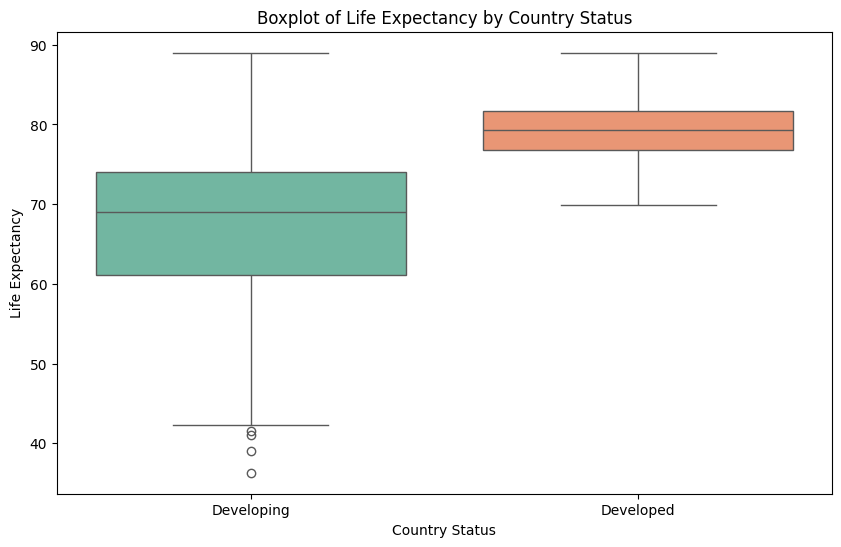

In [11]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=life_expectance_data, x="status", y="life_expectancy", hue="status", palette="Set2", dodge=False)
plt.title("Boxplot of Life Expectancy by Country Status")
plt.xlabel("Country Status")
plt.ylabel("Life Expectancy")
plt.legend([], [], frameon=False)
plt.show()

**Insight**: This boxplot provides a preliminary look at the disparities in life expectancy between developed and developing countries. Developed countries generally have a higher median life expectancy with less variability, suggesting consistent access to healthcare resources and stable living conditions that contribute to longer life spans. In contrast, developing countries display a wider range of life expectancy, with some exceptionally low values. This variation may reflect challenges such as limited healthcare resources and economic constraints, setting the stage for further analysis.

**Importance:** The presence of particularly low life expectancies in some developing countries underscores the need to explore factors such as healthcare quality, infrastructure, and economic challenges in these regions.

**2. Top 10 Countries by Life Expectancy**

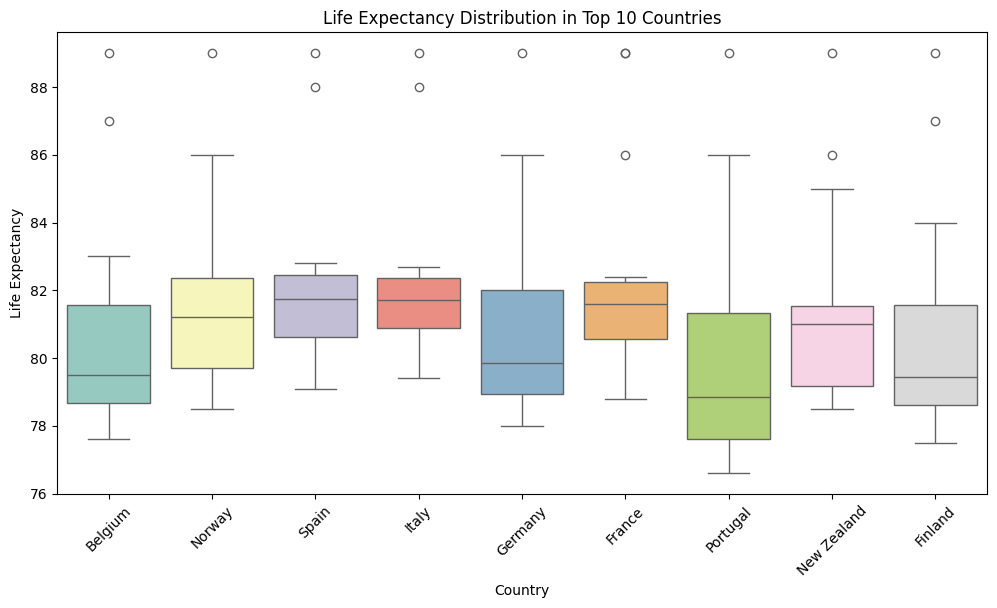

In [12]:
# Extracting the top 10 countries with the highest life expectancy
top_10_life_expectancy = life_expectance_data.nlargest(10, 'life_expectancy')[['country', 'life_expectancy']]

# Extracting the top 10 countries with the highest life expectancy for the boxplot
top_10_countries = top_10_life_expectancy['country']

# Filtering the main data to include only the top 10 countries, then sorting by life expectancy
top_10_data = life_expectance_data[life_expectance_data['country'].isin(top_10_countries)]
top_10_data = top_10_data.sort_values(by='life_expectancy', ascending=False)

# Creating the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_10_data, x='country', y='life_expectancy', hue='country', palette="Set3", dodge=False)
plt.title("Life Expectancy Distribution in Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Life Expectancy")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend([], [], frameon=False)  # Hides redundant legend
plt.show()


Key Observations:

Consistency in Life Expectancy: Countries like France, Spain, and Norway display narrow interquartile ranges (IQRs), indicating consistent life expectancy around the upper end, which may suggest stable health systems and social conditions.

Variation in Life Expectancy: Portugal shows more variability within the top 10, indicating possible internal disparities or challenges that affect life expectancy in certain areas.

Outliers: Some countries have outliers above their typical range, showing instances of particularly high life expectancy, potentially due to unique health, social, or environmental factors.

Relevance: This top-country analysis provides insight into the conditions and policies that may contribute to high life expectancy, helping to identify patterns among leading nations that could inform strategies for other countries.

**3. Trends in Life Expectancy Over Time by Country Status**

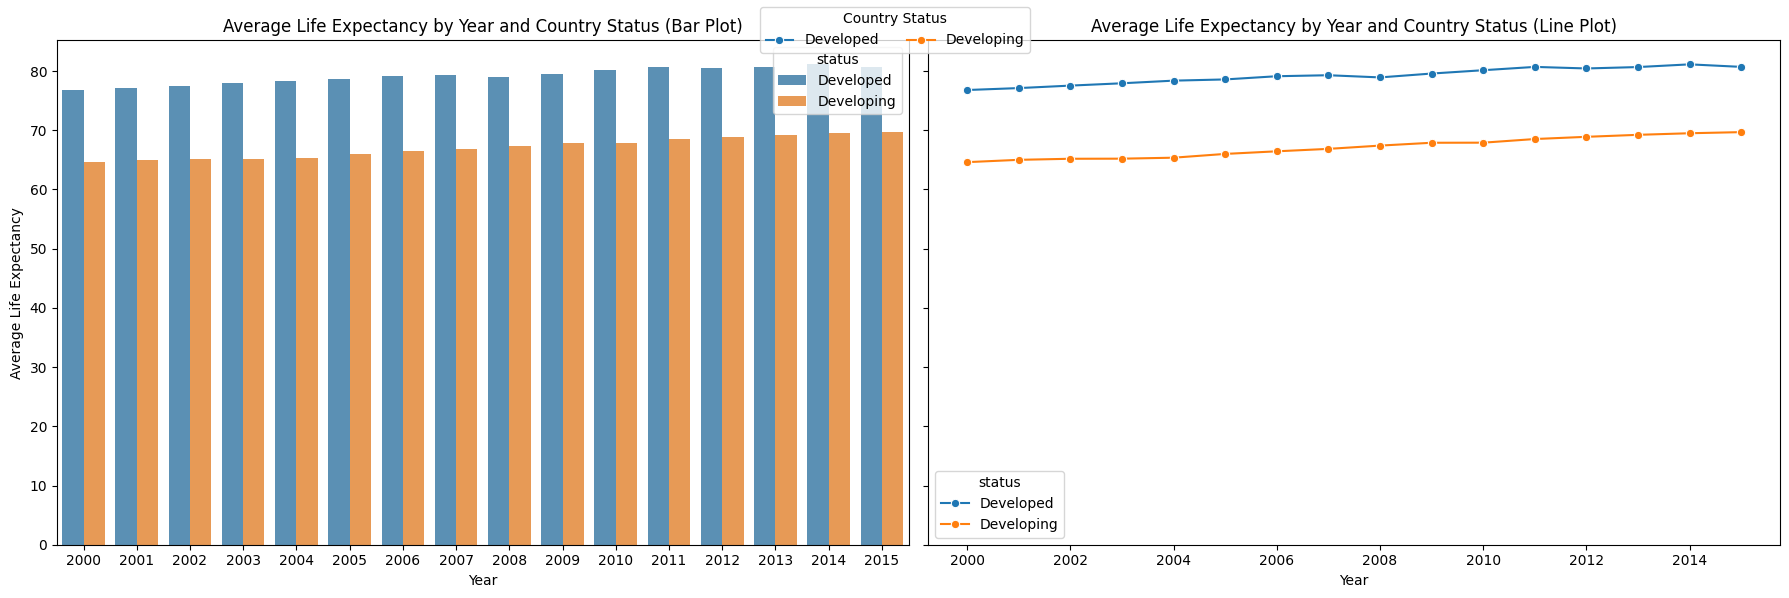

In [13]:
# Calculate the average life expectancy by year and country status
avg_life_expectancy_by_year = life_expectance_data.groupby(['year', 'status'])['life_expectancy'].mean().reset_index()

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Bar Plot
sns.barplot(data=avg_life_expectancy_by_year, x="year", y="life_expectancy", hue="status", ax=axes[0], alpha=0.8)
axes[0].set_title("Average Life Expectancy by Year and Country Status (Bar Plot)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Average Life Expectancy")

# Line Plot
sns.lineplot(data=avg_life_expectancy_by_year, x="year", y="life_expectancy", hue="status", marker="o", ax=axes[1])
axes[1].set_title("Average Life Expectancy by Year and Country Status (Line Plot)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("")

# Set a common legend
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, title="Country Status")

plt.tight_layout()
plt.show()

Insights: These bar and line plots illustrate that life expectancy has generally increased slightly over the 15-year period in both developed and developing countries. However, the consistent gap between the two remains evident, with developed countries showing higher life expectancy. The minimal growth in developing countries suggests that without significant interventions, bridging this gap may remain challenging.

Context: These trends over time help illustrate the persistent differences between developed and developing nations, encouraging a focus on policies and resources that may help narrow these disparities

**4. Healthcare Expenditure as a Percentage of GDP by Country Status**

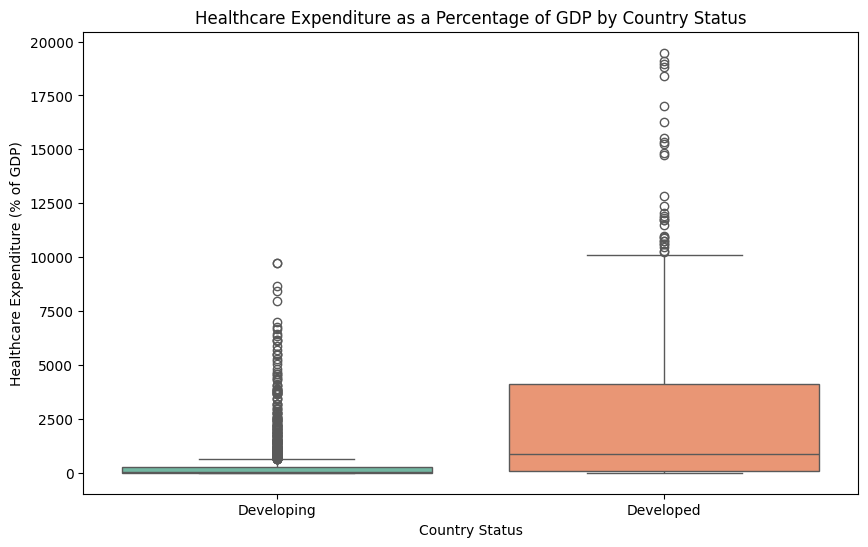

In [14]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create boxplot of healthcare expenditure (% of GDP) by country status
sns.boxplot(data=life_expectance_data, x="status", y="percentage_expenditure", hue="status", palette="Set2", dodge=False)

# Add title and axis labels
plt.title("Healthcare Expenditure as a Percentage of GDP by Country Status")
plt.xlabel("Country Status")
plt.ylabel("Healthcare Expenditure (% of GDP)")

# Hide redundant legend
plt.legend([], [], frameon=False)

# Show plot
plt.show()

Observation: Developed countries typically allocate a higher percentage of GDP to healthcare, as shown by the boxplot’s higher median and smaller variability. Developing countries display greater variability and generally lower median values, indicating that limited or inconsistent healthcare investment could be affecting their life expectancy.

Significance: This visualization underscores the impact that sustained healthcare spending may have on health outcomes, reinforcing the importance of economic resources in supporting public health

**5. Boxplots for Infant Deaths, Under-Five Deaths, and Alcohol Consumption**

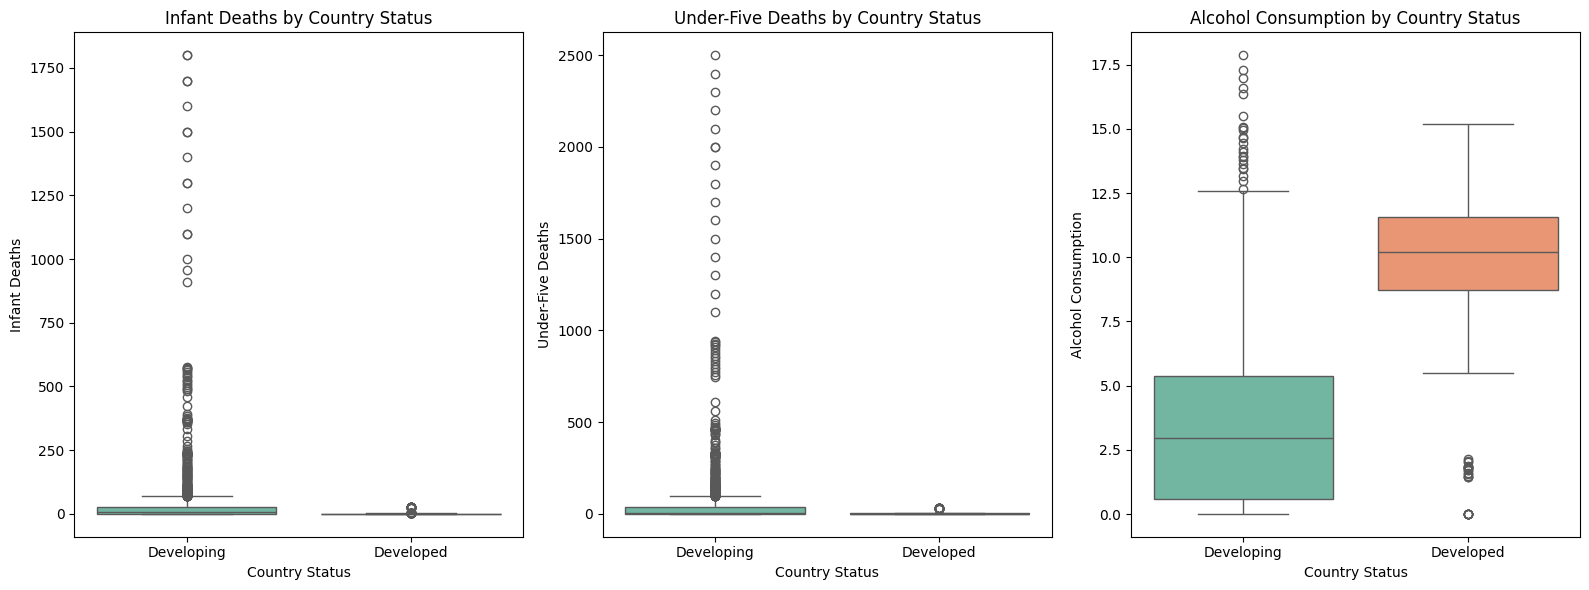

In [16]:
# Set up the figure for subplots
plt.figure(figsize=(16, 6))

# List of key variables for box plots
box_vars = ['infant_deaths', 'under-five_deaths', 'alcohol']
box_titles = ['Infant Deaths', 'Under-Five Deaths', 'Alcohol Consumption']

for i, var in enumerate(box_vars, start=1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=life_expectance_data, x="status", y=var, hue="status", palette="Set2", legend=False)
    plt.title(f'{box_titles[i-1]} by Country Status')
    plt.xlabel("Country Status")
    plt.ylabel(box_titles[i-1])

plt.tight_layout()
plt.show()


Key Observations:

Infant and Under-Five Deaths: Both infant and under-five deaths show significantly higher variability and median values in developing countries, likely reflecting limited healthcare access and higher child mortality.

Alcohol Consumption: Higher alcohol consumption is generally observed in developed countries, with a more consistent distribution. In developing countries, the wider range reflects varying lifestyle factors influenced by cultural, social, and economic differences.

Context: These health and lifestyle differences between developed and developing countries provide a foundational understanding of disparities in life expectancy determinants across regions.

With a foundational overview of key health and lifestyle differences between developed and developing countries, we can now delve into specific factors that influence life expectancy. This analysis will address each research question, exploring the strongest predictors of life expectancy, the role of economic status, and the impact of healthcare infrastructure and lifestyle factors across regions.

**Question 1: What are the strongest predictors of life expectancy?**

Identifying the strongest predictors of life expectancy offers insight into which areas countries can focus on to improve overall health outcomes. By examining correlations between life expectancy and various socioeconomic and health indicators, we can prioritize the most impactful factors.

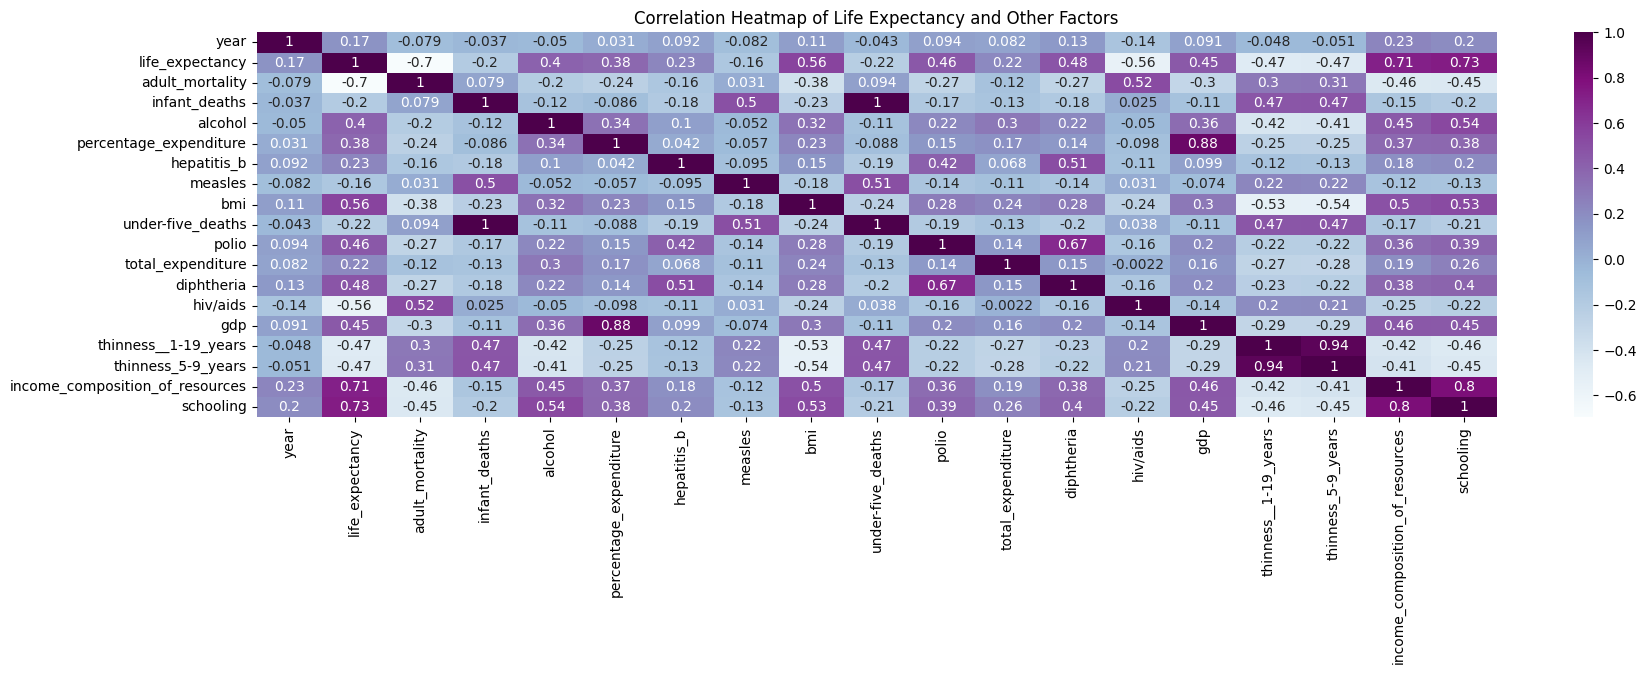

In [17]:
# Select only numeric columns for the correlation matrix
numeric_df = life_expectance_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(20, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu')
plt.title("Correlation Heatmap of Life Expectancy and Other Factors")
plt.show()


**Schooling (Correlation = 0.73)**  
- **Interpretation:** A correlation of 0.73 indicates a strong, positive relationship, meaning that as schooling levels increase, so does life expectancy. This finding highlights education’s role as a crucial factor in improving health outcomes. Educated populations are generally more informed about health practices, have better access to healthcare resources, and are more likely to engage in preventive care—all of which support longer lifespans.

**Income Composition of Resources (Correlation = 0.71)**  
- **Interpretation:** With a strong positive correlation of 0.71, income composition also significantly influences life expectancy. Countries with higher income composition, indicating greater access to resources and economic stability, tend to show higher life expectancies. Access to income resources improves living conditions, healthcare access, and lifestyle quality, contributing to longevity.

**Adult Mortality (Correlation = -0.70)**  
- **Interpretation:** The correlation of -0.70 indicates a strong negative relationship, meaning that as adult mortality rates rise, life expectancy falls. This makes sense, as high adult mortality rates often reflect inadequate healthcare, high disease prevalence, and overall poorer health conditions, all of which lower life expectancy. Thus, adult mortality serves as a marker of broader population health challenges.

**BMI (Correlation = 0.56)**  
- **Interpretation:** BMI has a moderate positive correlation of 0.56 with life expectancy, suggesting that healthy BMI levels (within a balanced range) are associated with longer lifespans. Populations with healthier BMI levels generally face fewer health risks, while underweight or overweight populations often encounter higher disease risks, impacting longevity.

**Polio Immunization (Correlation = 0.46) and Diphtheria Immunization (Correlation = 0.48)**  
- **Interpretation:** These moderate correlations reflect a beneficial relationship between higher immunization rates and increased life expectancy. Immunizations protect against serious diseases, with high coverage rates indicating robust healthcare systems. Populations with greater immunization rates tend to experience fewer preventable deaths, contributing to higher average lifespans.

**HIV/AIDS Prevalence (Correlation = -0.56)**  
- **Interpretation:** A moderate negative correlation of -0.56 implies that higher HIV/AIDS prevalence corresponds with lower life expectancy. This highlights HIV/AIDS’s severe impact on public health, as countries with higher prevalence rates often show reduced life expectancies due to the disease’s toll on immune health and related complications.

**GDP (Correlation = 0.45)**  
- **Interpretation:** The moderate positive correlation of 0.45 suggests that as GDP increases, life expectancy also tends to rise. GDP, as an economic measure, often correlates with better healthcare, infrastructure, and education investments, which typically improve overall health outcomes, leading to longer life expectancy.

---

**Summary:**  
Correlations close to ±1 indicate stronger linear relationships in this dataset:

- **High positive correlations** (e.g., Schooling, Income Composition) reflect strong beneficial links to life expectancy.
- **High negative correlations** (e.g., Adult Mortality, HIV/AIDS Prevalence) suggest that high values in these areas detrimentally impact life expectancy.
- **Moderate correlations** (e.g., BMI, immunization rates, GDP) highlight important, albeit less pronounced, relationships with life expectancy.






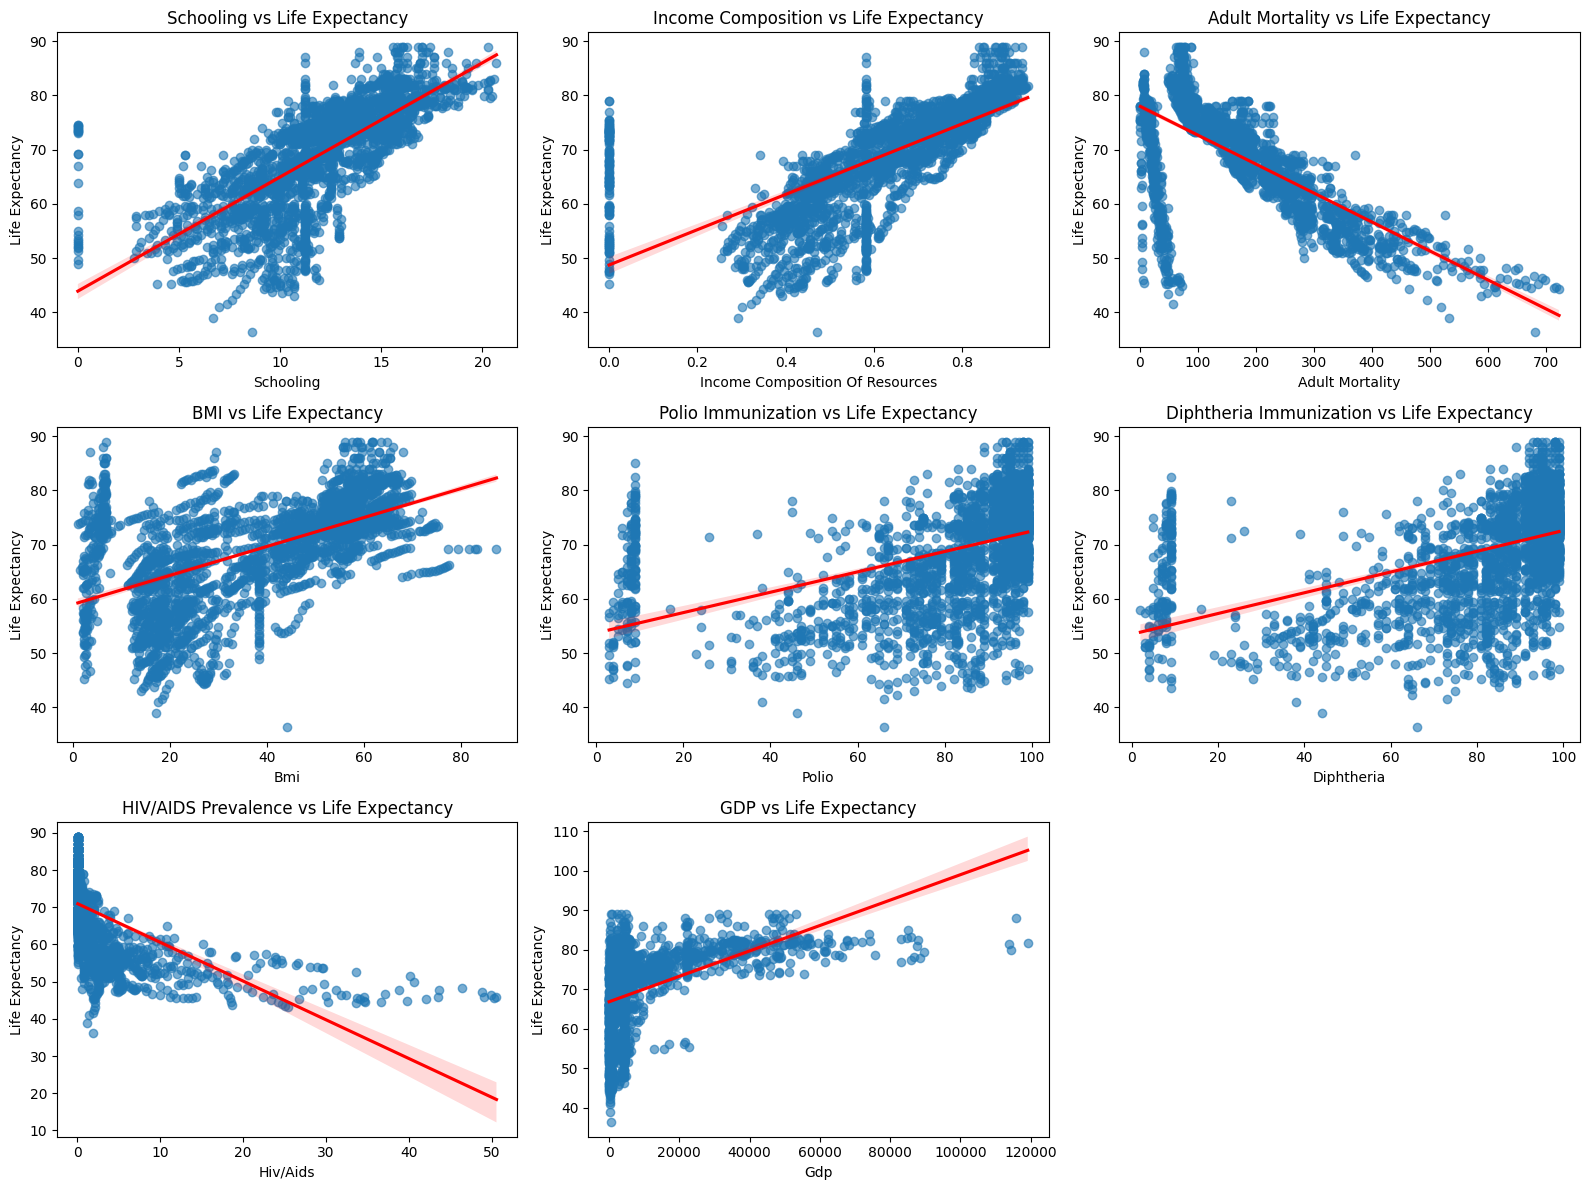

In [18]:
# Set up a larger figure for better visualization
plt.figure(figsize=(16, 12))

# List of key predictors for individual scatter plots with regression lines
key_predictors = [
    ("schooling", "Schooling vs Life Expectancy"),
    ("income_composition_of_resources", "Income Composition vs Life Expectancy"),
    ("adult_mortality", "Adult Mortality vs Life Expectancy"),
    ("bmi", "BMI vs Life Expectancy"),
    ("polio", "Polio Immunization vs Life Expectancy"),
    ("diphtheria", "Diphtheria Immunization vs Life Expectancy"),
    ("hiv/aids", "HIV/AIDS Prevalence vs Life Expectancy"),
    ("gdp", "GDP vs Life Expectancy")
]

# Loop through each predictor and create scatter plots with regression lines
for i, (predictor, title) in enumerate(key_predictors, start=1):
    plt.subplot(3, 3, i)  # Arrange in a 3x3 grid
    sns.regplot(data=life_expectance_data, x=predictor, y="life_expectancy", scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
    plt.title(title)
    plt.xlabel(predictor.replace("_", " ").title())
    plt.ylabel("Life Expectancy")

plt.tight_layout()
plt.show()



### 1. **Schooling vs. Life Expectancy**

This graph reveals a strong positive correlation between **schooling** and **life expectancy**, as demonstrated by the upward-sloping regression line. Countries with higher levels of education generally exhibit longer life expectancies.

#### Explanation
Each additional year of schooling is associated with an increase in life expectancy. This trend suggests that education is a key determinant of population health, reflecting how educated populations tend to have better health outcomes.

#### Interpretation
The link between education and health outcomes can be attributed to multiple factors:
- **Health Literacy**: Education improves people’s understanding of health information, empowering them to make informed decisions regarding their diets, lifestyle choices, and healthcare.
- **Employment Opportunities**: Education opens doors to better employment prospects, which are often accompanied by improved working conditions, health insurance, and financial stability.
- **Social Determinants of Health**: Education typically correlates with other positive social indicators, such as access to safe housing and nutritious food, lowering illness risks and enhancing overall well-being.

In essence, increasing educational attainment serves as an effective policy focus for improving population health, indirectly impacting life expectancy through improved income, living conditions, and health practices. For instance, countries with high educational levels, like Japan, generally report high life expectancy, underscoring this connection.

---

### 2. **Income Composition of Resources vs. Life Expectancy**

There is a strong positive relationship between **income composition** (a measure of resource availability) and **life expectancy**, with the steep upward slope in the regression line indicating a robust association.

#### Explanation
Higher income composition reflects the financial resources available to individuals, which is essential for maintaining health and well-being.

#### Interpretation
The link between income and health is straightforward, as income provides access to resources crucial for a healthy life:
- **Healthcare Access**: Financial stability enables individuals to afford medical treatments, preventive check-ups, and medications essential for disease prevention and management.
- **Nutrition and Safe Living Conditions**: Adequate income supports access to nutritious food and secure housing, reducing health risks associated with malnutrition and environmental hazards.
- **Mental Health**: Economic security can reduce stress and improve mental health, contributing to overall physical well-being.

This analysis suggests that policies aimed at improving income equality and resource distribution could substantially enhance life expectancy in many regions.

---

### 3. **Adult Mortality vs. Life Expectancy**

The inverse correlation between **adult mortality** and **life expectancy** is one of the most pronounced in this analysis, as shown by the steep downward slope. As adult mortality increases, life expectancy declines sharply.

#### Explanation
This relationship highlights that high adult mortality rates often indicate poor health outcomes and limited healthcare access.

#### Interpretation
Adult mortality reflects multiple dimensions of a country’s health and socioeconomic status:
- **Healthcare Infrastructure**: High adult mortality rates suggest a lack of adequate healthcare systems to treat preventable or treatable conditions.
- **Disease Burden**: Limited access to treatments for chronic and infectious diseases, such as heart disease, diabetes, or tuberculosis, can lead to elevated adult mortality, especially in developing countries.
- **Socioeconomic Conditions**: Poverty, low education levels, and unsafe working conditions contribute to higher adult mortality rates.

Investing in healthcare infrastructure and public health interventions to reduce adult mortality is critical for improving life expectancy. The stark difference in life expectancy between countries with low and high adult mortality highlights this need.

---

### 4. **BMI vs. Life Expectancy**

The plot shows a moderate positive correlation between **BMI** and **life expectancy**, with a steady upward trend.

#### Explanation
A balanced BMI typically reflects adequate nutrition and good health, while extreme values can indicate undernutrition or obesity-related health risks.

#### Interpretation
BMI as a health indicator varies by region, but generally:
- **Nutrition and Physical Health**: Populations maintaining a healthy BMI tend to exhibit better immune function and overall health.
- **Chronic Disease**: High BMI levels correlate with increased risk for chronic conditions, such as heart disease and diabetes, potentially reducing life expectancy.
- **Regional Variation**: Cultural and regional dietary differences mean BMI impacts health differently across populations.

This graph suggests that promoting balanced nutrition and healthy lifestyle habits positively affects life expectancy, though extreme BMI values in either direction can be detrimental.

---

### 5. **Polio Immunization vs. Life Expectancy**

This scatter plot reveals a positive correlation between **polio immunization rates** and **life expectancy**, underscoring the value of preventive healthcare.

#### Explanation
Higher polio immunization rates imply more comprehensive public health efforts, which generally improve population health.

#### Interpretation
Polio immunization indicates broader healthcare access and public health measures:
- **Preventive Healthcare**: Countries with high polio immunization rates likely have strong healthcare infrastructure and prioritize preventive care.
- **Public Health Programs**: Immunization often accompanies other public health initiatives, such as sanitation, maternal care, and nutrition programs, collectively improving health outcomes.
- **Childhood Health**: Immunization reduces childhood mortality, which directly impacts life expectancy metrics.

This trend highlights that higher immunization rates contribute to a robust healthcare system, improving life expectancy.

---

### 6. **Diphtheria Immunization vs. Life Expectancy**

Similar to polio, **diphtheria immunization rates** positively correlate with **life expectancy**.

#### Explanation
Immunization against diphtheria reflects preventive healthcare accessibility and investment in public health.

#### Interpretation
Diphtheria immunization coverage relates to national healthcare priorities:
- **Infectious Disease Prevention**: High immunization rates prevent disease outbreaks, directly improving public health.
- **Healthcare Access**: Widespread immunization is often linked to public health investments and accessibility, promoting better health outcomes.
- **Child Survival**: Immunization efforts reduce childhood mortality, significantly impacting average life expectancy.

This graph emphasizes that preventive healthcare, like immunization programs, plays a crucial role in enhancing life expectancy.

---

### 7. **HIV/AIDS Prevalence vs. Life Expectancy**

The relationship between **HIV/AIDS prevalence** and **life expectancy** is markedly negative, as shown by a steep downward trend.

#### Explanation
High HIV/AIDS prevalence severely impacts life expectancy, particularly in regions with limited healthcare resources.

#### Interpretation
HIV/AIDS affects life expectancy directly by increasing mortality rates and indirectly through its socioeconomic impact:
- **High Mortality**: HIV/AIDS has a high mortality rate without treatment, disproportionately affecting working-age adults, which can destabilize communities.
- **Healthcare Strain**: High prevalence rates burden healthcare resources, limiting the capacity to address other health needs.
- **Economic Impact**: High HIV/AIDS prevalence affects economic productivity and increases dependency ratios, straining resources and reducing life expectancy.

This finding highlights the importance of public health interventions and resources for disease management in regions with high HIV/AIDS prevalence.

---

### 8. **GDP vs. Life Expectancy**

The positive relationship between **GDP** and **life expectancy** suggests that wealthier countries typically have healthier populations.

#### Explanation
GDP is a broad indicator of a nation’s economic health, closely linked to its capacity for healthcare, education, and infrastructure investment.

#### Interpretation
Higher GDP allows for investments that enhance population well-being:
- **Healthcare Infrastructure**: Wealthier countries are more likely to have well-equipped hospitals, trained healthcare professionals, and available medicines.
- **Preventive Programs**: Countries with high GDPs often have preventive health programs and early detection services that improve public health.
- **Standard of Living**: Higher GDP correlates with safer housing, access to clean water, and nutritious food, all contributing to longevity.

This correlation highlights that while GDP supports longer life expectancy, effective allocation of resources toward public welfare plays a critical role.

---

### Summary

This analysis of key predictors offers a nuanced view of factors influencing life expectancy:
- **Strong Positive Correlations** with life expectancy, like schooling and income composition, underscore the value of socioeconomic stability in promoting health.
- **Strong Negative Correlations** with life expectancy, such as adult mortality and HIV/AIDS prevalence, highlight the need for targeted health interventions to mitigate risks.
- **Moderate Correlations**, like BMI, immunization rates, and GDP, indicate significant but variable impacts on longevity.

These insights stress the importance of comprehensive public health strategies that address education, economic stability, and healthcare access to improve life expectancy globally.

**2. Research Question 2: How does economic status (e.g., GDP, income composition) impact life expectancy differently in developed vs. developing countries?**


This analysis aims to uncover the differential impacts of economic indicators, specifically GDP and Income Composition of Resources, on life expectancy in developed versus developing countries. This approach helps determine if economic status has a universally positive effect or if its influence varies based on country status.

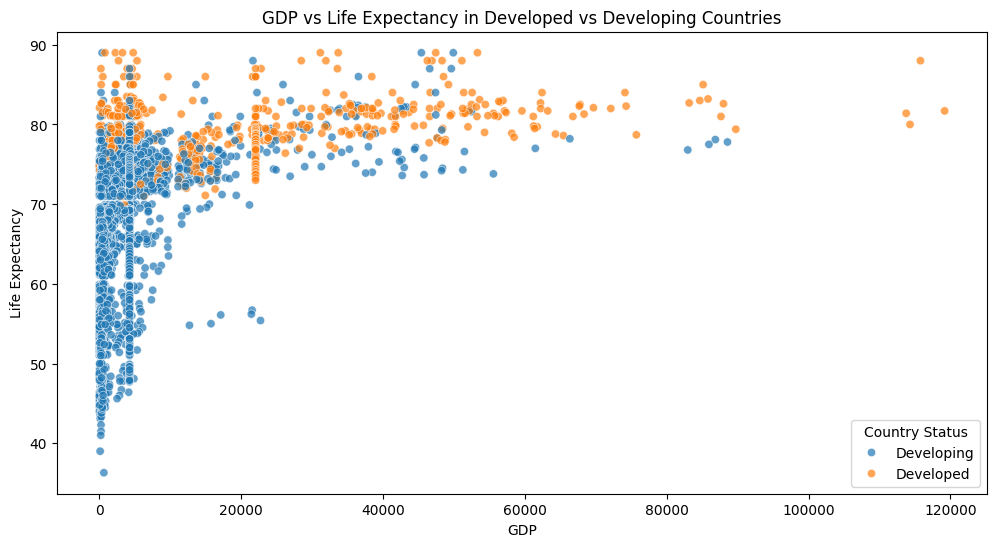

In [19]:
#  scatter plot of GDP vs. Life Expectancy by country status
plt.figure(figsize=(12, 6))
sns.scatterplot(data=life_expectance_data, x="gdp", y="life_expectancy", hue="status", alpha=0.7)
plt.title("GDP vs Life Expectancy in Developed vs Developing Countries")
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")
plt.legend(title="Country Status")
plt.show()

The scatter plot shows the relationship between **GDP** and **Life Expectancy** across **developed** and **developing countries**.

### Key Observations:

1. **Positive Relationship in Developed Countries**:
   - The orange points, representing developed countries, generally cluster at higher GDP values and show consistently high life expectancy (mostly above 75 years).
   - In developed countries, we see a clear trend where higher GDP corresponds with high life expectancy. This trend suggests that wealthier nations invest more effectively in healthcare, education, and infrastructure, which support longer lifespans.

2. **Variable Relationship in Developing Countries**:
   - The blue points, representing developing countries, span a wide range of GDP values but tend to cluster at lower GDPs compared to developed countries.
   - Developing countries show more variability in life expectancy at similar GDP levels. For instance, countries with GDP values below 20,000 can have life expectancies ranging from 40 to over 80 years. This suggests that GDP alone is not a reliable indicator of life expectancy in developing countries, likely due to additional factors like healthcare access, political stability, and social infrastructure.

3. **Impact of Economic Resources**:
   - For countries with high GDPs (above 60,000), life expectancy is consistently high, regardless of country status. This highlights the importance of economic resources in supporting public health and well-being.
   - In contrast, low GDP countries (mainly developing) experience a wide disparity in life expectancy, suggesting that other factors (like healthcare quality, education, and public policies) play a critical role in these regions.

4. **Ceiling Effect in Developed Countries**:
   - Many developed countries show a “ceiling” effect, where life expectancy stabilizes around 80-90 years, even as GDP continues to increase. This indicates that after reaching a certain economic threshold, further increases in GDP have diminishing returns on life expectancy.

### Interpretation:
This plot highlights the difference in how GDP impacts life expectancy based on country development status:
- **In developed countries**, higher GDP consistently supports high life expectancy, emphasizing the role of economic stability and robust healthcare systems.
- **In developing countries**, GDP alone is less predictive of life expectancy. Other factors, such as effective healthcare infrastructure and equitable distribution of resources, are essential to improving health outcomes.

**Key Insight:** Limitations of GDP as a Sole Predictor in Developing Countries
Based on the results, GDP alone does not fully explain life expectancy in developing countries. This finding raises a crucial question:

What are the Key Determinants of Life Expectancy in Developing Countries Beyond GDP?

To investigate this, we focused on alternative predictors such as education, healthcare access, and disease prevalence, which may provide a fuller understanding of life expectancy in these regions.

**Further Analysis: Key Determinants of Life Expectancy in Developing Countries Beyond GDP**

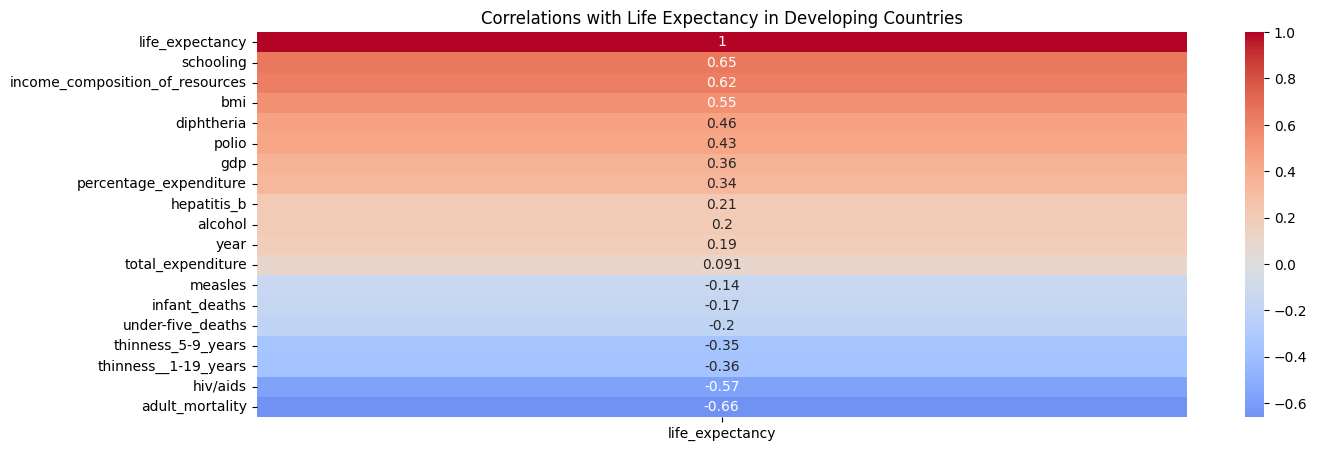

In [20]:
# Filter the dataset for developing countries only
developing_countries_data = life_expectance_data[life_expectance_data["status"] == "Developing"]

# Select only numeric columns
numeric_developing_data = developing_countries_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlations and sort by Life Expectancy
correlations_with_life_expectancy = numeric_developing_data.corr()[['life_expectancy']].sort_values(by='life_expectancy', ascending=False)

# Plot the heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(correlations_with_life_expectancy, annot=True, cmap="coolwarm", center=0)
plt.title("Correlations with Life Expectancy in Developing Countries")
plt.show()



### Positive Correlations
1. **Schooling (0.65)**: Strongly linked to higher life expectancy, as education improves health literacy and economic opportunities.
2. **Income Composition of Resources (0.62)**: Financial stability and resource access are crucial for health and longevity.
3. **BMI (0.55)**: A healthy BMI correlates with longer life expectancy, reflecting good nutrition.
4. **Immunization Rates (Diphtheria 0.46, Polio 0.43)**: Preventive healthcare reduces mortality, boosting life expectancy.
5. **GDP (0.36)**: Moderate correlation, suggesting that while wealth matters, targeted health and education investments are more impactful.

### Negative Correlations
1. **Adult Mortality (-0.66)**: Higher adult mortality rates strongly reduce life expectancy, indicating limited healthcare access.
2. **HIV/AIDS Prevalence (-0.57)**: High disease prevalence lowers life expectancy, stressing the need for disease management.
3. **Thinness in Children (-0.36, -0.35)**: Malnutrition in early years correlates with lower life expectancy.

### Implications
For developing countries, investments in education, economic stability, and healthcare—especially immunization and nutrition—are key to improving life expectancy.

**Visual Analysis of Key Predictors in Developing Countries**

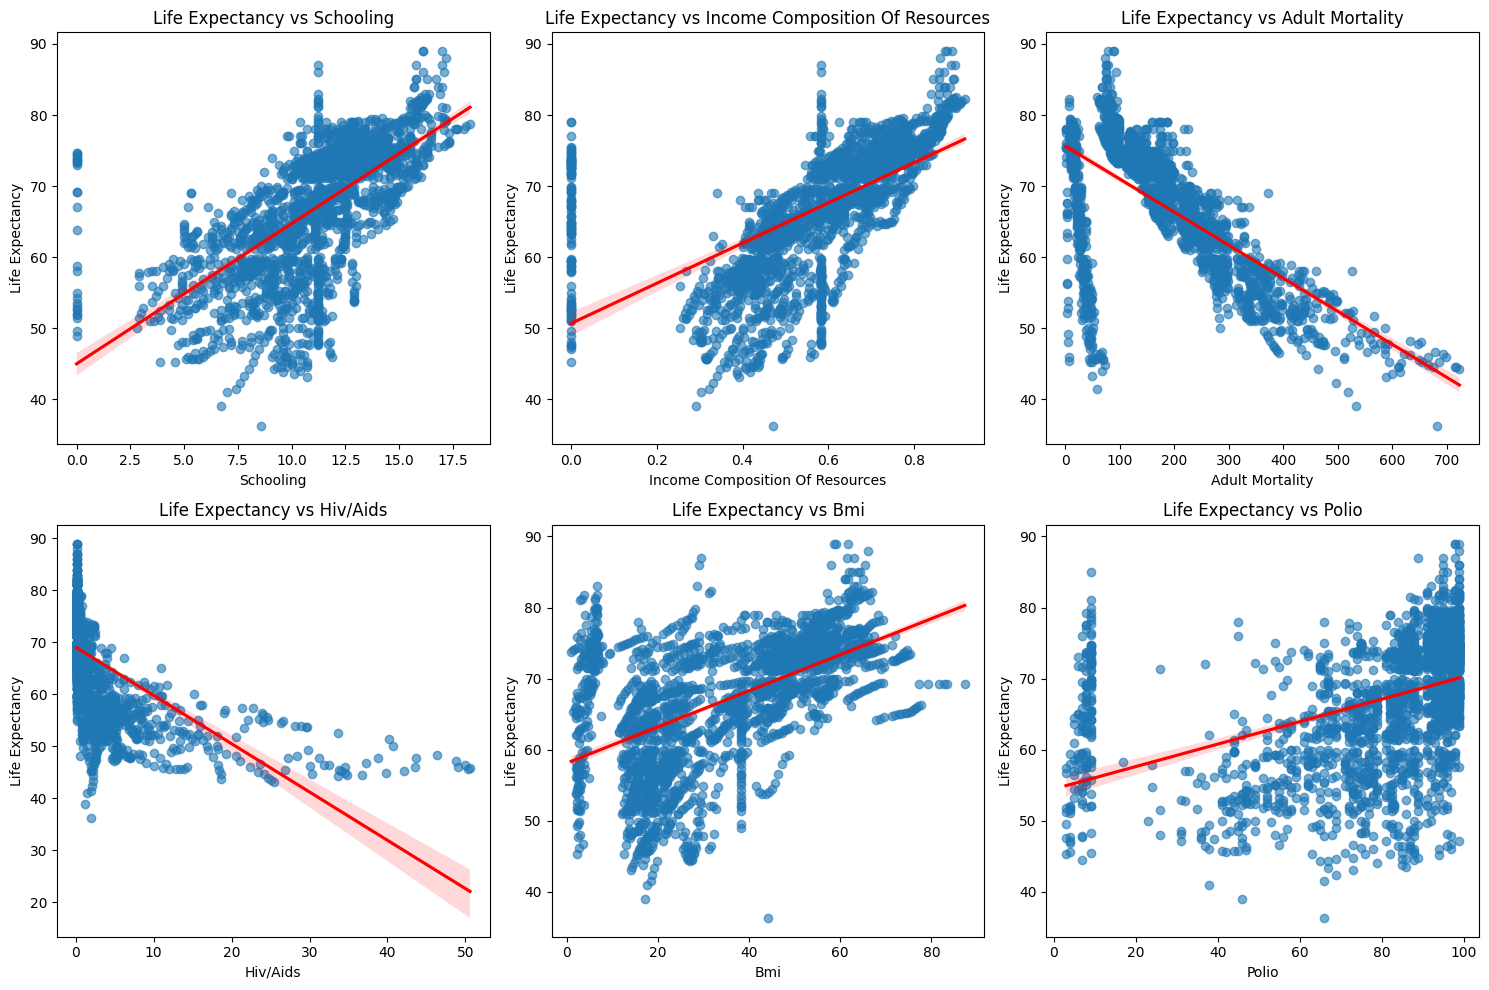

In [21]:
# Set up the plot grid
plt.figure(figsize=(15, 10))

# Define key predictors
key_predictors = ["schooling", "income_composition_of_resources", "adult_mortality", "hiv/aids", "bmi", "polio"]

# Loop through each predictor to create scatter plots with regression lines
for i, predictor in enumerate(key_predictors, start=1):
    plt.subplot(2, 3, i)  # Arrange in a 2x3 grid for readability
    sns.regplot(data=developing_countries_data, x=predictor, y="life_expectancy", scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
    plt.title(f"Life Expectancy vs {predictor.replace('_', ' ').title()}")
    plt.xlabel(predictor.replace('_', ' ').title())
    plt.ylabel("Life Expectancy")

plt.tight_layout()
plt.show()

**Explanation of Graphs**

**Schooling:** The positive trend shows that higher levels of education are linked to longer life expectancy. Education improves health knowledge, economic opportunities, and access to healthcare, which collectively support a healthier life.

**Income Composition of Resources:** This positive correlation indicates that financial stability enables access to essentials like healthcare, nutrition, and safe housing, all contributing to increased life expectancy.

**Adult Mortality:** The strong negative trend highlights that higher adult mortality rates are associated with lower life expectancy, underscoring the importance of accessible healthcare and disease prevention.

HIV/AIDS Prevalence: This negative correlation shows that higher rates of HIV/AIDS reduce life expectancy significantly, reflecting the impact of infectious diseases on population health in developing countries.

**BMI:** The moderate positive relationship suggests that a balanced BMI, representing good nutrition and physical health, supports a longer life.

**Polio Immunization:** The positive trend indicates that higher immunization rates contribute to increased life expectancy by reducing preventable mortality from infectious diseases.

**Conclusion**

These factors—education, economic stability, healthcare access, and preventive measures—have a more direct influence on life expectancy in developing countries than GDP alone. While GDP has an impact, targeted interventions in education, immunization, and disease management are more effective at improving life expectancy, showing that a focus on specific health and social investments can drive better health outcomes.



**2. Income Composition of Resources vs. Life Expectancy in Developed and Developing Countries**

While GDP provides a general measure of economic stability, Income Composition of Resources offers a more targeted view of individual access to financial and social resources, which may directly impact health and longevity. The next graph explores the relationship between income composition and life expectancy, segmented by developed and developing countries, to see if access to resources plays a distinct role in each context

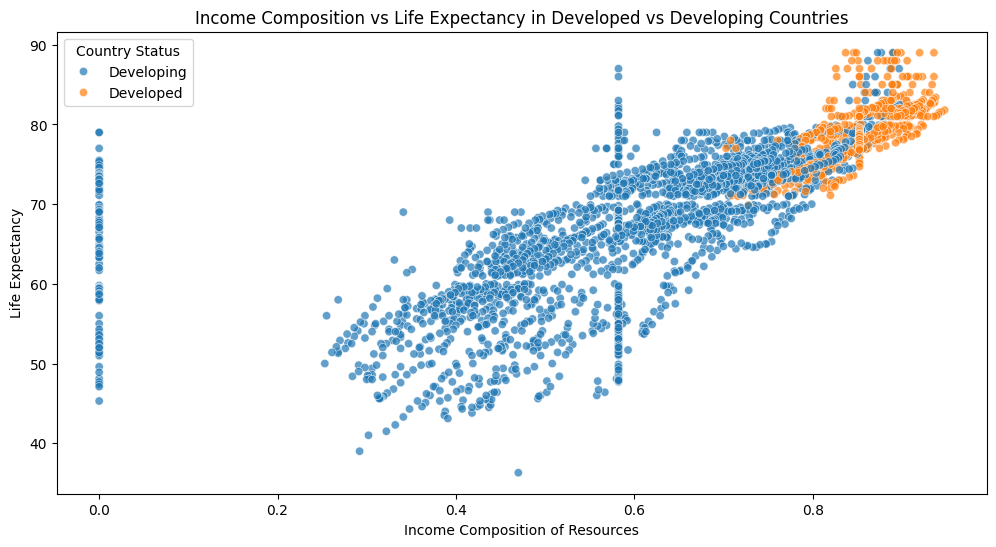

In [22]:
#  scatter plot of Income Composition vs. Life Expectancy by country status
plt.figure(figsize=(12, 6))
sns.scatterplot(data=life_expectance_data, x="income_composition_of_resources", y="life_expectancy", hue="status", alpha=0.7)
plt.title("Income Composition vs Life Expectancy in Developed vs Developing Countries")
plt.xlabel("Income Composition of Resources")
plt.ylabel("Life Expectancy")
plt.legend(title="Country Status")
plt.show()



This scatter plot illustrates the relationship between **Income Composition of Resources** and **Life Expectancy** in **developed** and **developing countries**.

### Key Observations

1. **Positive Correlation**: There is a clear positive relationship between income composition (access to financial and social resources) and life expectancy. As income composition increases, so does life expectancy, highlighting the critical role of economic resources in promoting health and longevity.

2. **Differences by Country Status**:
   - **Developed Countries (orange)**: These countries generally cluster at high income composition levels and exhibit consistently high life expectancies (mostly above 70 years). This reflects the stability and health benefits associated with robust access to resources.
   - **Developing Countries (blue)**: Developing countries show a wider range of income composition and life expectancy values, indicating greater variability. This spread suggests that life expectancy in developing countries is more sensitive to fluctuations in income composition.

3. **Variability at Zero Income Composition**:
   - For developing countries with zero income composition, life expectancy ranges from about 40 to over 70 years. This wide range implies that factors beyond financial resources—such as government health programs, community support, or international aid—might help sustain life expectancy even in low-resource settings.

4. **Variability at Higher Income Composition (0.6)**:
   - Interestingly, at an income composition level of around 0.6, there is also  variability in life expectancy among developing countries. Life expectancy at this level ranges from roughly 60 to over 80 years, suggesting that, even with moderate resource access, other factors such as healthcare quality, disease prevalence, and social infrastructure significantly impact longevity.

### Conclusion

This analysis demonstrates that while **income composition** is a crucial factor in life expectancy, variability at both low (0) and moderate (0.6) levels in developing countries suggests that **non-economic factors** (such as healthcare infrastructure, disease management, and social support) also play a critical role. Therefore, improving life expectancy in developing countries may require a combination of economic support and targeted health and social programs.

**Adult Mortality vs. Life Expectancy Graph**

After examining GDP and income composition, we can see that economic resources indeed play a significant role in life expectancy, particularly in developed countries where resource access is more stable. However, health outcomes are influenced by more than just economic resources; healthcare access and disease management also directly impact longevity, especially in regions where resources are limited.

The following graph explores the relationship between Adult Mortality—a direct indicator of healthcare quality—and Life Expectancy in both developed and developing countries. By examining adult mortality rates alongside economic factors, we can better understand how economic and health variables together shape life expectancy in different contexts.

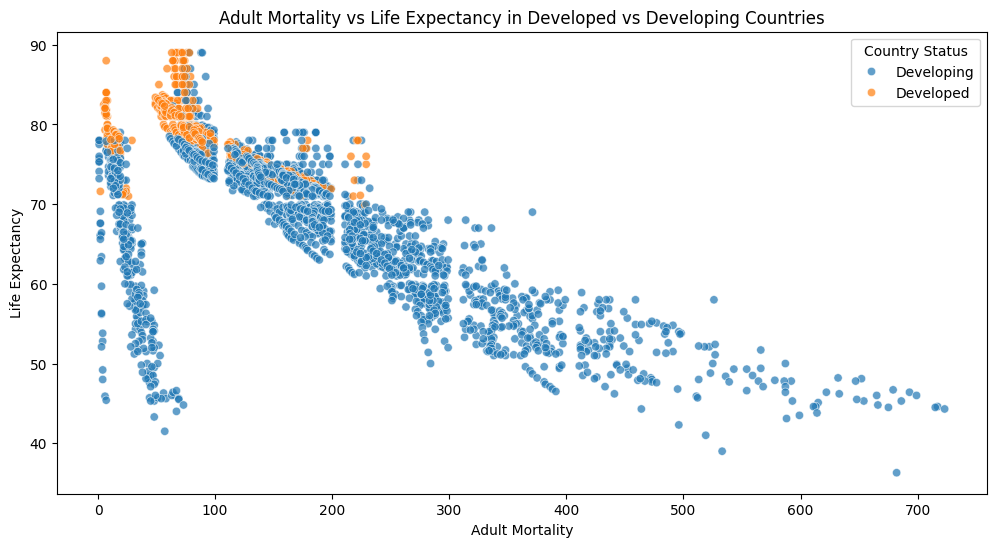

In [23]:
# scatter plot of Adult Mortality vs Life Expectancy by country status
plt.figure(figsize=(12, 6))
sns.scatterplot(data=life_expectance_data, x="adult_mortality", y="life_expectancy", hue="status", alpha=0.7)
plt.title("Adult Mortality vs Life Expectancy in Developed vs Developing Countries")
plt.xlabel("Adult Mortality")
plt.ylabel("Life Expectancy")
plt.legend(title="Country Status")
plt.show()

**Adult Mortality vs. Life Expectancy Graph**

This scatter plot illustrates the relationship between **Adult Mortality** and **Life Expectancy** in **developed** and **developing countries**, revealing two clear clusters that highlight the different mortality and life expectancy patterns.

### Key Observations

There is a clear negative relationship between adult mortality and life expectancy. Higher adult mortality rates correspond with significantly lower life expectancy, underscoring the impact of healthcare access and quality on longevity.

1. **Two Distinct Clusters**:
   - The data naturally separates into two groups:
     - **Developed Countries (orange)**: Clustered tightly in the upper-left region, where adult mortality is relatively low, and life expectancy is consistently high, generally above 70 years.
     - **Developing Countries (blue)**: Forming a broader and more dispersed cluster across the rest of the plot, with higher adult mortality rates and a wider range of life expectancies, often below 70 years.

2. **Explanation of the Developed Countries Cluster**:
   - Developed countries benefit from **advanced healthcare systems, high standards of living, and comprehensive public health policies**, resulting in consistently low adult mortality and high life expectancy. This group’s tight clustering shows that these factors help achieve stable health outcomes across developed nations, creating a consistent pattern.

3. **Explanation of the Developing Countries Cluster**:
   - In developing countries, the wide spread reflects **variability in healthcare access, economic resources, and disease prevalence**. This dispersion indicates that life expectancy in these countries is highly sensitive to fluctuations in adult mortality, which can be affected by limited healthcare resources, high disease burden, and socioeconomic challenges.


4. **Implications**:
   - This separation into clusters emphasizes that **economic resources alone are not enough** to achieve high life expectancy. The developed countries' cluster suggests that **consistent healthcare quality, preventive measures, and social support systems** are crucial in maintaining low adult mortality and high life expectancy.
   - For developing countries, reducing the wide variability in life expectancy will likely require investments in healthcare infrastructure, disease prevention, and public health programs that can mitigate the impact of high adult mortality rates.

### Conclusion

The two distinct clusters in the graph demonstrate that **life expectancy is closely linked to adult mortality**, but the effect is significantly moderated by healthcare infrastructure, economic stability, and public health systems. Developed countries achieve consistently high life expectancy through robust healthcare systems, while developing countries show a more varied pattern due to limited resources and infrastructure. This finding highlights the need for both economic and healthcare-focused interventions to improve life expectancy in developing regions.



**Percentage expenditur and total expenditure vs Life Expectancy Graph**

Adult mortality rates offer insight into healthcare quality, but to understand a country’s overall commitment to health, we also need to examine both the total healthcare expenditure as a percentage of government spending and as a share of GDP. These metrics reveal how much priority a nation places on health. The following graph explores the relationship between these healthcare spending indicators and life expectancy in developed and developing countries, assessing whether higher healthcare prioritization translates into better health outcomes

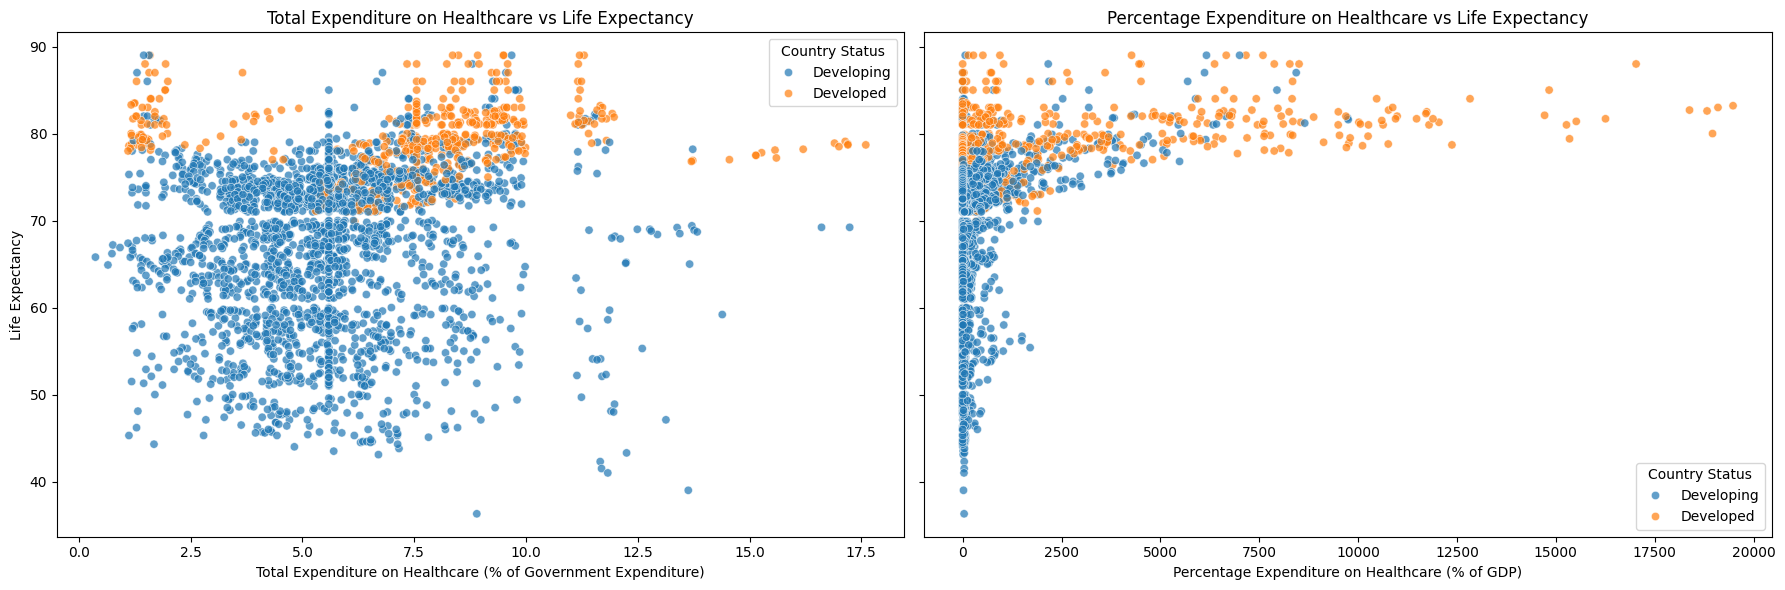

In [24]:
# Set up the figure for subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Plot 1: Total Expenditure on Healthcare vs Life Expectancy by Country Status
sns.scatterplot(data=life_expectance_data, x="total_expenditure", y="life_expectancy", hue="status", alpha=0.7, ax=axes[0])
axes[0].set_title("Total Expenditure on Healthcare vs Life Expectancy")
axes[0].set_xlabel("Total Expenditure on Healthcare (% of Government Expenditure)")
axes[0].set_ylabel("Life Expectancy")
axes[0].legend(title="Country Status")

# Plot 2: Percentage Expenditure on Healthcare (as % of GDP) vs Life Expectancy by Country Status
sns.scatterplot(data=life_expectance_data, x="percentage_expenditure", y="life_expectancy", hue="status", alpha=0.7, ax=axes[1])
axes[1].set_title("Percentage Expenditure on Healthcare vs Life Expectancy")
axes[1].set_xlabel("Percentage Expenditure on Healthcare (% of GDP)")
axes[1].legend(title="Country Status")

plt.tight_layout()
plt.show()

### Explanation of the Two Scatter Plots:

#### 1. **Total Expenditure on Healthcare vs. Life Expectancy**
   - **Interpretation**: This plot shows the relationship between **Total Expenditure on Healthcare** (as a percentage of government expenditure) and **Life Expectancy** across developed and developing countries.
   - **Developed Countries**: The data points (orange) for developed countries tend to cluster with relatively higher life expectancy, mostly above 75 years, regardless of the total healthcare expenditure. This suggests that in developed countries, life expectancy remains high and is less sensitive to variations in total healthcare spending as a percentage of government expenditure.
   - **Developing Countries**: For developing countries (blue points), there is more variation in life expectancy, ranging widely from 40 to 80 years, even with similar healthcare expenditure percentages. This indicates that total healthcare expenditure alone may not significantly impact life expectancy in developing countries, as other factors like healthcare quality, accessibility, and socio-economic conditions also play crucial roles.

   - **Conclusion**: The limited impact of total healthcare expenditure on life expectancy, especially in developed countries, suggests that higher spending does not necessarily lead to higher life expectancy. In developing countries, higher total expenditure might not be sufficient without improvements in healthcare infrastructure and access.

#### 2. **Percentage Expenditure on Healthcare vs. Life Expectancy**
   - **Interpretation**: This plot shows the relationship between **Percentage Expenditure on Healthcare** (as a percentage of GDP) and **Life Expectancy**. This metric captures healthcare spending in relation to a country's economic output.
   - **Developed Countries**: Similar to the previous plot, developed countries (orange points) show a high clustering around life expectancy values of 75-90 years, even at a wide range of healthcare expenditure percentages. Some developed countries allocate a high percentage of GDP to healthcare, but this does not appear to correlate with a substantial increase in life expectancy.
   - **Developing Countries**: Developing countries (blue points) display a wider spread in life expectancy across various levels of healthcare expenditure. However, even at low expenditure levels (close to 0% of GDP), some developing countries achieve moderate life expectancy values. This indicates that factors beyond healthcare spending relative to GDP, such as socio-economic stability and public health interventions, influence life expectancy.

   - **Conclusion**: The percentage of GDP spent on healthcare appears to have a limited direct impact on life expectancy, particularly for developed countries. In developing countries, the relationship is more complex, as low expenditure levels coincide with a broad range of life expectancy outcomes, suggesting that healthcare spending needs to be complemented by effective health systems and socio-economic improvements to drive significant life expectancy gains.

### Overall Insight:
Both plots highlight that healthcare spending (whether measured as a percentage of government expenditure or GDP) alone does not have a straightforward impact on life expectancy. In developed countries, life expectancy remains high irrespective of fluctuations in healthcare expenditure. In developing countries, higher life expectancy appears to depend on a combination of economic and healthcare investments, along with improvements in healthcare quality and accessibility.


### Conclusion for Research Question 2

Economic status significantly influences life expectancy, but its impact varies between developed and developing countries:

- **GDP and Income Composition**: Both GDP and income composition are positively associated with life expectancy across all countries. However, developing countries exhibit greater variability in life expectancy at similar economic levels, indicating that other factors (such as healthcare infrastructure and socio-economic stability) are critical in these regions. In developing countries, higher income composition directly supports health by improving access to resources, healthcare, and better living conditions, which collectively promote longevity.

- **Healthcare Expenditure**: The effect of healthcare spending on life expectancy differs based on how it is measured and the country’s development status. In developed countries, life expectancy remains high with limited sensitivity to increased healthcare spending, as their established healthcare systems already ensure robust health outcomes. In developing countries, healthcare expenditure has a more variable impact on life expectancy. While increased spending may have positive effects, it is often insufficient on its own to drive substantial improvements in life expectancy without concurrent investments in healthcare quality and accessibility.

- **Overall Insight**: Economic growth and targeted healthcare investments are essential for raising life expectancy in developing countries, as these investments address both direct and indirect determinants of health. For developed countries, further gains in life expectancy may require efficiency improvements and targeted health interventions, rather than merely increasing healthcare spending. This suggests that developing countries benefit most from strategies that combine economic support with healthcare improvements, while developed nations may prioritize optimizing existing systems for more effective health outcomes.



**Research Question 3: What is the role of healthcare infrastructure (e.g., immunization rates, HIV/AIDS prevalence) in influencing life expectancy?**


In this section, we’ll examine the relationship between healthcare infrastructure factors, such as immunization rates and disease prevalence, and their impact on life expectancy. This will help us understand how preventive healthcare and disease management shape health outcomes in developed and developing countries.

1: Analyzing Immunization Rates vs. Life Expectancy


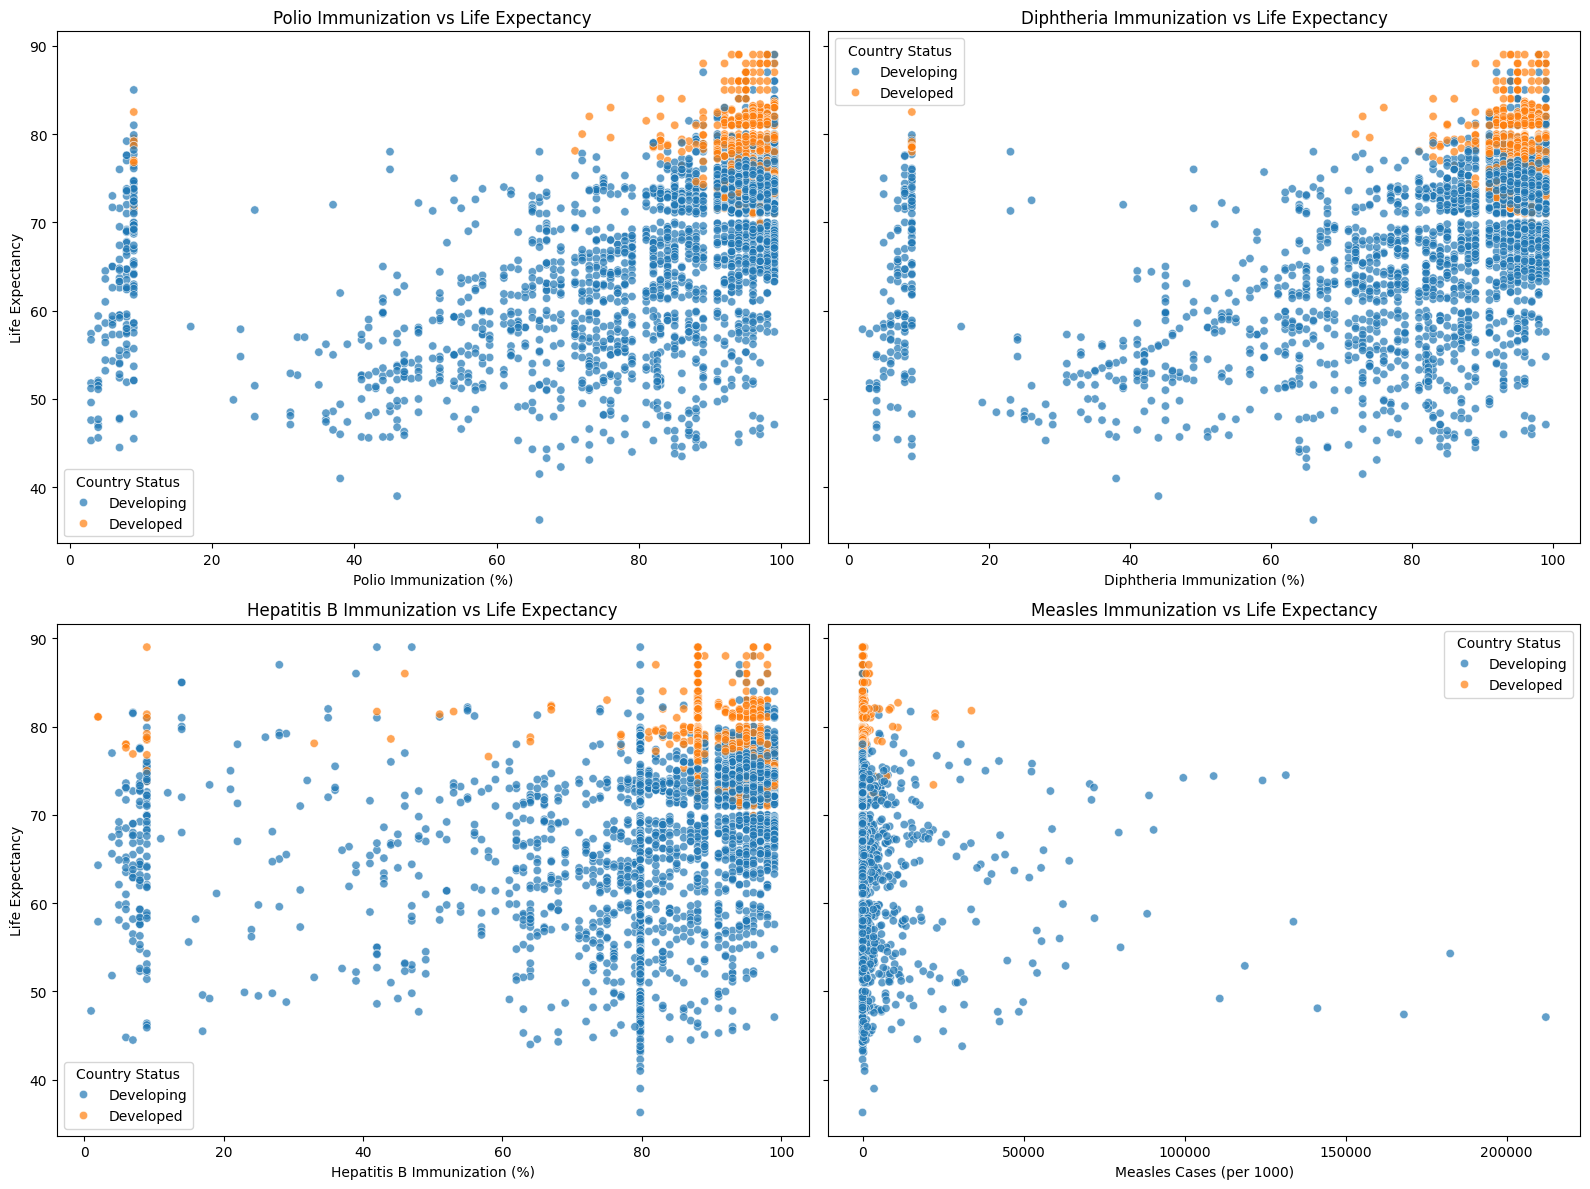

In [25]:
# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True)

# Scatter plot for Polio Immunization vs. Life Expectancy
sns.scatterplot(data=life_expectance_data, x="polio", y="life_expectancy", hue="status", alpha=0.7, ax=axes[0, 0])
axes[0, 0].set_title("Polio Immunization vs Life Expectancy")
axes[0, 0].set_xlabel("Polio Immunization (%)")
axes[0, 0].set_ylabel("Life Expectancy")
axes[0, 0].legend(title="Country Status")

# Scatter plot for Diphtheria Immunization vs. Life Expectancy
sns.scatterplot(data=life_expectance_data, x="diphtheria", y="life_expectancy", hue="status", alpha=0.7, ax=axes[0, 1])
axes[0, 1].set_title("Diphtheria Immunization vs Life Expectancy")
axes[0, 1].set_xlabel("Diphtheria Immunization (%)")
axes[0, 1].legend(title="Country Status")

# Scatter plot for Hepatitis B Immunization vs. Life Expectancy
sns.scatterplot(data=life_expectance_data, x="hepatitis_b", y="life_expectancy", hue="status", alpha=0.7, ax=axes[1, 0])
axes[1, 0].set_title("Hepatitis B Immunization vs Life Expectancy")
axes[1, 0].set_xlabel("Hepatitis B Immunization (%)")
axes[1, 0].set_ylabel("Life Expectancy")
axes[1, 0].legend(title="Country Status")

# Scatter plot for Measles Immunization vs. Life Expectancy
sns.scatterplot(data=life_expectance_data, x="measles", y="life_expectancy", hue="status", alpha=0.7, ax=axes[1, 1])
axes[1, 1].set_title("Measles Immunization vs Life Expectancy")
axes[1, 1].set_xlabel("Measles Cases (per 1000)")
axes[1, 1].legend(title="Country Status")

plt.tight_layout()
plt.show()


### Polio Immunization vs. Life Expectancy
- **Observation**: Higher polio immunization rates generally correlate with higher life expectancy. Developed countries (orange) are clustered at high immunization rates (close to 100%) with high life expectancy, while developing countries (blue) show a broader range in both immunization coverage and life expectancy, reflecting variability in healthcare access and infrastructure.

### Diphtheria Immunization vs. Life Expectancy
- **Observation**: Similar to polio, high diphtheria immunization rates are associated with higher life expectancy, especially in developed countries, which consistently have high immunization rates and life expectancies. Developing countries display more variation, with some countries achieving high life expectancy despite lower immunization rates, potentially due to other health or social factors.

### Hepatitis B Immunization vs. Life Expectancy
- **Observation**: Hepatitis B immunization shows a weaker association with life expectancy compared to polio and diphtheria. While high immunization rates are common in developed countries with higher life expectancies, developing countries exhibit a wide distribution, suggesting that hepatitis B immunization alone may not significantly influence life expectancy in these regions.

### Measles Cases vs. Life Expectancy
- **Observation**: A high number of measles cases is generally associated with lower life expectancy, especially in developing countries, where lower life expectancy correlates with higher measles incidence. Developed countries have fewer measles cases and higher life expectancies, indicating effective immunization and disease prevention programs.

**HIV/AIDS Prevalence vs. Life Expectancy in Developed and Developing Countries**

We’ll examine how HIV/AIDS prevalence correlates with life expectancy, segmented by country status.

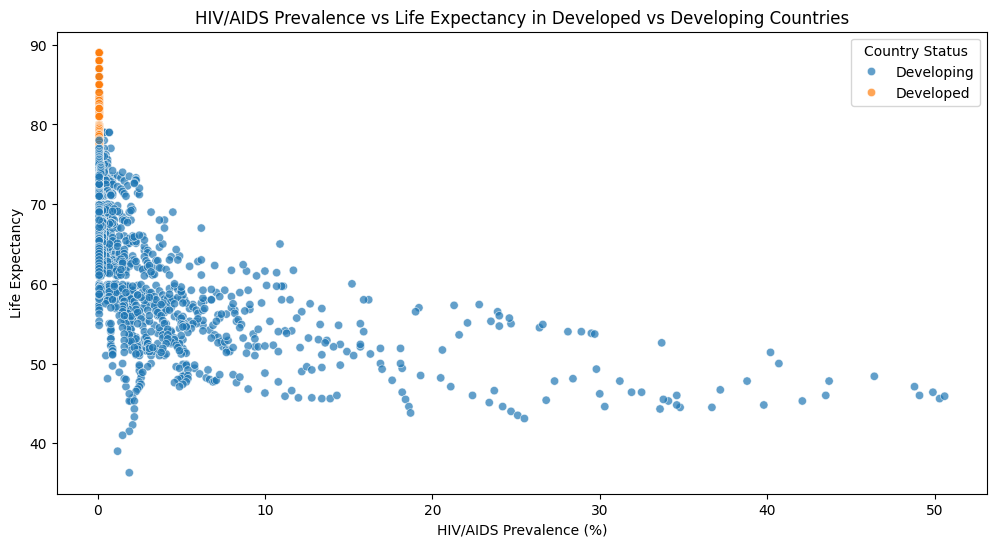

In [26]:
# Scatter plot of HIV/AIDS Prevalence vs. Life Expectancy by country status
plt.figure(figsize=(12, 6))
sns.scatterplot(data=life_expectance_data, x="hiv/aids", y="life_expectancy", hue="status", alpha=0.7)
plt.title("HIV/AIDS Prevalence vs Life Expectancy in Developed vs Developing Countries")
plt.xlabel("HIV/AIDS Prevalence (%)")
plt.ylabel("Life Expectancy")
plt.legend(title="Country Status")
plt.show()

### HIV/AIDS Prevalence vs. Life Expectancy in Developed and Developing Countries

This graph examines the relationship between **HIV/AIDS prevalence** and **life expectancy** in both developed and developing countries.

#### Key Observations

1. **Strong Negative Correlation**:
   - There is a clear negative relationship between HIV/AIDS prevalence and life expectancy, especially in developing countries (blue points). Higher rates of HIV/AIDS are associated with significantly lower life expectancy. This reflects the severe health impacts of HIV/AIDS in regions where access to effective treatment and healthcare resources may be limited.

2. **Developed Country Cluster**:
   - Developed countries (orange points) are tightly clustered near the top left, with low HIV/AIDS prevalence and high life expectancy (around 80 years or above). This indicates that developed countries typically have lower prevalence rates, likely due to better healthcare infrastructure, access to antiretroviral treatments, and effective public health measures for prevention and management.

3. **Variability in Developing Countries**:
   - In developing countries, there is wide variability in life expectancy at low levels of HIV/AIDS prevalence, ranging from 40 to over 70 years. This suggests that while low HIV/AIDS prevalence is beneficial, life expectancy in these countries is influenced by additional factors, such as general healthcare access, nutrition, and socioeconomic conditions.

4. **Severe Impact at High Prevalence Levels**:
   - For HIV/AIDS prevalence rates above 10%, life expectancy in developing countries drops significantly, often falling below 60 years. This trend highlights the importance of disease management and access to healthcare in improving life expectancy in regions with high HIV/AIDS prevalence.

#### Summary

This graph shows that high HIV/AIDS prevalence is a major factor limiting life expectancy, particularly in developing countries. Effective disease management, access to antiretroviral treatments, and public health interventions are essential to mitigating the impact of HIV/AIDS on life expectancy. Developed countries benefit from strong healthcare systems that help maintain low prevalence and high life expectancy, whereas developing countries face a steeper decline in life expectancy as HIV/AIDS prevalence rises.


### Summary for Research Question 3

Our analysis shows that healthcare interventions and disease prevalence significantly impact life expectancy, with distinct patterns between developed and developing countries:

1. **Immunization**: Higher immunization rates for diseases like polio and diphtheria correlate with longer life expectancy in both developed and developing countries. However, developing nations show more variability in life expectancy due to additional healthcare and socioeconomic challenges.

2. **HIV/AIDS Prevalence**: High HIV/AIDS prevalence is strongly linked to lower life expectancy, especially in developing countries where healthcare access is limited. Developed countries generally maintain low prevalence and high life expectancy, benefiting from robust healthcare systems.

**Conclusion**: Immunization and effective disease management are key drivers of life expectancy. While developed countries benefit from comprehensive healthcare, targeted health interventions in developing nations are crucial to improving life expectancy outcomes.

**4. How do lifestyle and nutrition factors (e.g., BMI, alcohol consumption) affect life expectancy across different regions?**

To address the fourth research question, we will examine the influence of lifestyle and nutrition factors—specifically BMI (Body Mass Index) and alcohol consumption—on life expectancy across different regions. These factors provide insights into how health behaviors and lifestyle choices impact longevity, potentially varying by country status (developed vs. developing).

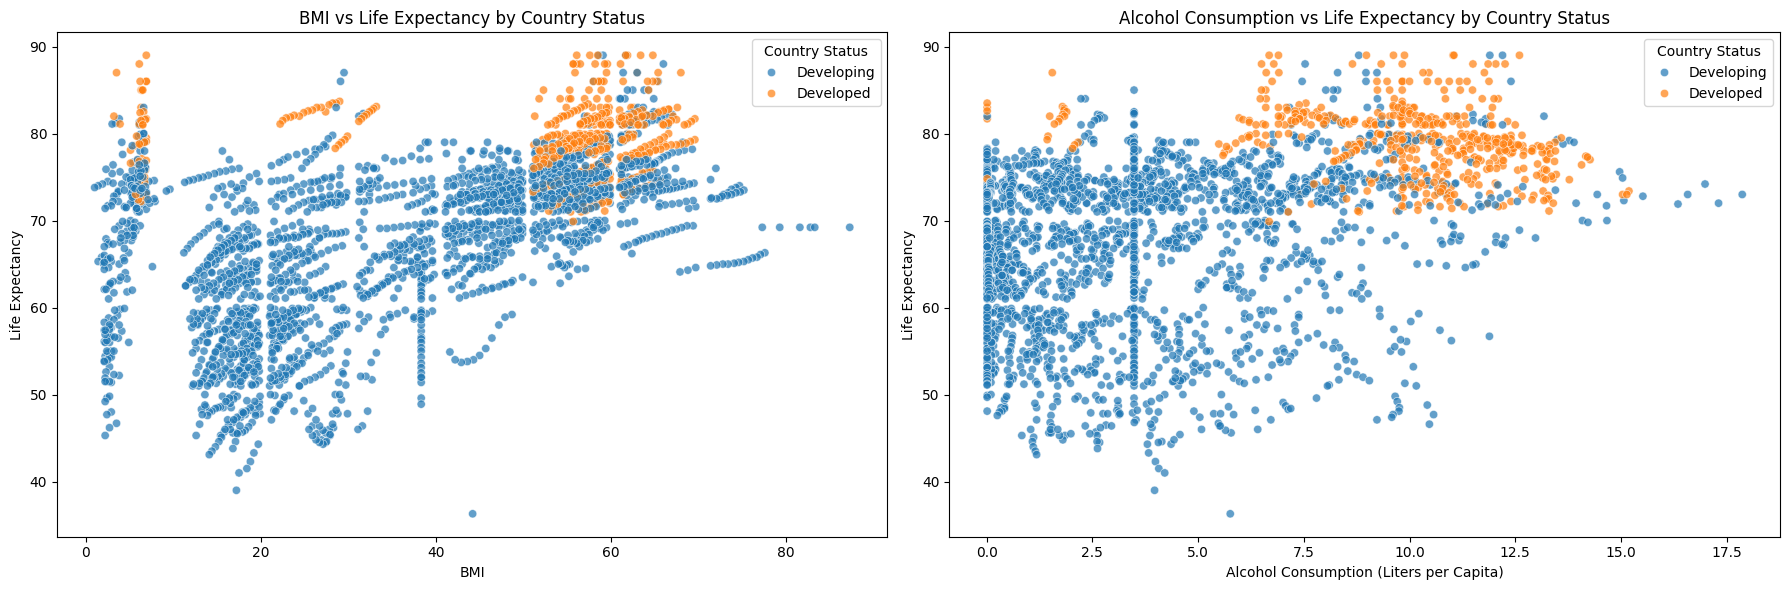

In [27]:
# Set up the figure with 1 row and 2 columns
plt.figure(figsize=(18, 6))

# Scatter plot for BMI vs Life Expectancy
plt.subplot(1, 2, 1)
sns.scatterplot(data=life_expectance_data, x="bmi", y="life_expectancy", hue="status", alpha=0.7)
plt.title("BMI vs Life Expectancy by Country Status")
plt.xlabel("BMI")
plt.ylabel("Life Expectancy")
plt.legend(title="Country Status")

# Scatter plot for Alcohol Consumption vs Life Expectancy
plt.subplot(1, 2, 2)
sns.scatterplot(data=life_expectance_data, x="alcohol", y="life_expectancy", hue="status", alpha=0.7)
plt.title("Alcohol Consumption vs Life Expectancy by Country Status")
plt.xlabel("Alcohol Consumption (Liters per Capita)")
plt.ylabel("Life Expectancy")
plt.legend(title="Country Status")

# Display the plots
plt.tight_layout()
plt.show()


### BMI vs. Life Expectancy
- **Developed Countries (Orange Points):** The developed countries cluster around a BMI range from 20 to 30, with generally higher life expectancy (often above 75 years). This range suggests that people in developed countries maintain a relatively balanced BMI, associated with better health and longevity.
- **Developing Countries (Blue Points):** Developing countries display a wider range of BMIs and a lower average life expectancy. In these countries, BMI values span a broader spectrum, including lower and higher values, which may indicate undernutrition in some populations and higher risks of obesity-related conditions in others.
  
  **Insight:** While there is some positive association between BMI and life expectancy in developed countries, the relationship is less clear in developing countries, likely due to variability in healthcare access, nutrition, and public health resources.

### Alcohol Consumption vs. Life Expectancy
- **Developed Countries (Orange Points):** Developed countries tend to have higher levels of alcohol consumption per capita (5 to 15 liters) and generally higher life expectancy (above 70 years). This observation could indicate that moderate alcohol consumption does not significantly lower life expectancy in these regions, possibly due to the availability of robust healthcare systems that mitigate associated health risks.
- **Developing Countries (Blue Points):** In developing countries, alcohol consumption varies widely, but life expectancy remains lower. Higher alcohol consumption in some developing countries correlates with lower life expectancy, likely due to the combined effects of limited healthcare access and the impact of excessive drinking on health.

  **Insight:** The relationship between alcohol consumption and life expectancy is more complex, as moderate consumption may not significantly impact life expectancy in developed regions, while in developing countries, higher consumption might exacerbate health issues due to limited healthcare access.

### Conclusion
- **BMI and Life Expectancy:** In developed countries, maintaining a balanced BMI is associated with higher life expectancy, whereas in developing countries, the variability in BMI reflects broader issues of undernutrition and obesity-related health challenges.
- **Alcohol Consumption and Life Expectancy:** Higher alcohol consumption does not drastically lower life expectancy in developed countries, likely due to better healthcare systems. However, in developing countries, higher alcohol consumption may contribute to lower life expectancy, especially where healthcare systems are less equipped to manage alcohol-related health conditions.

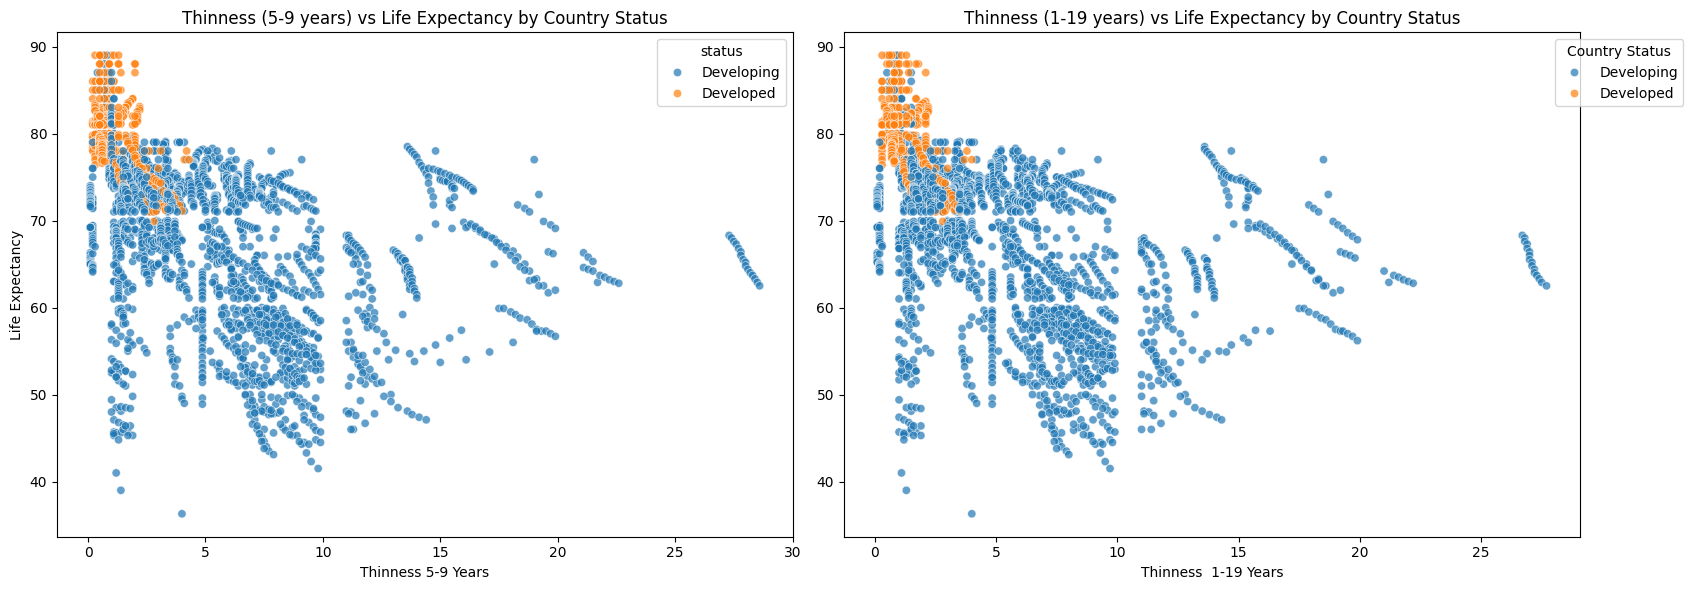

In [28]:
# Set up the plot grid
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Define each variable to be plotted
variables = ["thinness_5-9_years", "thinness__1-19_years"]
titles = [
    "Thinness (5-9 years) vs Life Expectancy by Country Status",
    "Thinness (1-19 years) vs Life Expectancy by Country Status"
]

# Loop through each variable to create scatter plots with country status as hue
for i, var in enumerate(variables):
    sns.scatterplot(data=life_expectance_data, x=var, y="life_expectancy", hue="status", alpha=0.7, ax=axs[i])
    axs[i].set_title(titles[i])
    axs[i].set_xlabel(var.replace("_", " ").title())
    axs[i].set_ylabel("Life Expectancy" if i == 0 else "")  # Only label the y-axis once for clarity

# Adjust layout for better readability
plt.tight_layout()
plt.legend(title="Country Status", loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()

### Key Observations

1. **Negative Correlation with Life Expectancy**:
   - In both plots, as thinness values increase, life expectancy tends to decrease. This negative trend suggests that higher thinness levels, which may reflect malnutrition or poor dietary access, are associated with lower life expectancy.

2. **Distinct Clustering by Country Status**:
   - Developed countries (orange points) generally cluster at lower thinness levels and higher life expectancy values, indicating better nutrition and healthcare access.
   - Developing countries (blue points) exhibit a wider range of thinness values and lower life expectancy, especially with increasing thinness levels. This wider spread suggests that malnutrition is a more pronounced issue in these countries.

3. **Higher Impact in Developing Countries**:
   - The impact of thinness on life expectancy appears more severe in developing countries, where malnutrition-related conditions are prevalent. High thinness values in developing regions correspond with a sharper drop in life expectancy, underscoring the importance of addressing nutritional deficits to improve health outcomes.

### Why This Makes Sense

Thinness, particularly in younger age groups, is often an indicator of malnutrition, which can lead to weakened immune systems, susceptibility to infections, and hindered physical and cognitive development. In developing countries, limited access to nutritious food and healthcare exacerbates this issue, directly impacting life expectancy.

In developed countries, better healthcare and nutritional access mitigate the extreme effects of thinness, reflected in a more stable life expectancy across a narrower range of thinness values. This pattern underscores the need for targeted nutritional interventions in developing regions to combat malnutrition and improve population health and longevity.

### Conclusion

This analysis provides a multifaceted exploration of the determinants of life expectancy across developed and developing nations. By examining key factors—such as economic stability, healthcare access, lifestyle choices, and preventive health measures—we gain a nuanced understanding of the variables that contribute to population health and longevity.

The research reveals that life expectancy is closely tied to socioeconomic and healthcare infrastructure, with distinct patterns emerging between developed and developing regions:

1. **Economic Stability and Education**: Higher levels of GDP, income composition, and schooling consistently correlate with increased life expectancy, particularly in developed countries where robust economic stability enables sustained investment in public health, education, and healthcare access. In developing countries, economic resources are crucial but are not as strong predictors on their own. Here, targeted investments in education and resource access have a more pronounced impact, underscoring the need for inclusive social policies.

2. **Healthcare Investment and Preventive Care**: Developed countries show high life expectancies despite relatively moderate fluctuations in healthcare spending, suggesting that a baseline level of healthcare infrastructure and quality is well-established. In contrast, developing countries display more variability in life expectancy relative to healthcare spending, indicating that expenditure alone is insufficient without improvements in healthcare delivery and accessibility. Immunization rates for diseases like polio and diphtheria are particularly impactful in developing nations, highlighting the importance of preventive care and access to basic healthcare services.

3. **Lifestyle Factors and Disease Burden**: While lifestyle factors such as balanced BMI and moderate alcohol consumption are associated with higher life expectancy, they influence developed and developing countries differently. In developed nations, lifestyle choices often have a stabilizing effect on life expectancy due to better healthcare systems managing the associated risks. However, in developing regions, poor nutrition (reflected in high thinness values) and limited resources to manage diseases like HIV/AIDS lead to reduced life expectancy, stressing the need for programs that address both nutrition and disease prevention.

4. **Healthcare Quality and Mortality Rates**: High adult mortality rates and the prevalence of HIV/AIDS show a strong negative correlation with life expectancy, especially in developing countries where limited healthcare access heightens these effects. Reducing adult mortality and improving disease management are critical in enhancing longevity in these regions, as they directly impact population health and the workforce.

### Final Insights

This analysis underscores that life expectancy improvements, particularly in developing nations, require a holistic approach that goes beyond economic growth. While wealth enables access to essential services, the role of targeted health interventions, preventive care, and access to education cannot be overstated. For developed countries, additional gains in life expectancy may come from optimizing existing healthcare systems and promoting healthier lifestyle choices. In developing nations, however, sustainable improvements are best achieved by addressing foundational public health needs, strengthening healthcare infrastructure, and investing in socioeconomic stability.

Ultimately, this project highlights that enhancing life expectancy globally requires a multifaceted strategy tailored to each region’s unique challenges and resources. By focusing on these factors, both developed and developing countries can create more resilient and healthier populations, contributing to the broader goal of global health equity.
